# House Prices - Advanced Regression Techniques
## Goal：Predict house prices based on 79 features

## Step 1: Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm, skew
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

### EDA

In [3]:
print("Raw train data size: ", train_data.shape)
print("Raw test data size: ", test_data.shape)

Raw train data size:  (1460, 81)
Raw test data size:  (1459, 80)


In [4]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# ID column is useless
train_data.drop('Id', axis=1, inplace=True)
test_data.drop('Id', axis=1, inplace=True)
train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
print("Train data size after dropping 'Id': ", train_data.shape)
print("Test data size after dropping 'Id': ", test_data.shape)

Train data size after dropping 'Id':  (1460, 80)
Test data size after dropping 'Id':  (1459, 79)


### Data description
* SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
* MSSubClass: The building class
* MSZoning: The general zoning classification
* LotFrontage: Linear feet of street connected to property
* LotArea: Lot size in square feet
* Street: Type of road access
* Alley: Type of alley access
* LotShape: General shape of property
* LandContour: Flatness of the property
* Utilities: Type of utilities available
* LotConfig: Lot configuration
* LandSlope: Slope of property
* Neighborhood: Physical locations within Ames city limits
* Condition1: Proximity to main road or railroad
* Condition2: Proximity to main road or railroad (if a second is present)
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* YearRemodAdd: Remodel date
* RoofStyle: Type of roof
* RoofMatl: Roof material
* Exterior1st: Exterior covering on house
* Exterior2nd: Exterior covering on house (if more than one material)
* MasVnrType: Masonry veneer type
* MasVnrArea: Masonry veneer area in square feet
* ExterQual: Exterior material quality
* ExterCond: Present condition of the material on the exterior
* Foundation: Type of foundation
* BsmtQual: Height of the basement
* BsmtCond: General condition of the basement
* BsmtExposure: Walkout or garden level basement walls
* BsmtFinType1: Quality of basement finished area
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinType2: Quality of second finished area (if present)
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* TotalBsmtSF: Total square feet of basement area
* Heating: Type of heating
* HeatingQC: Heating quality and condition
* CentralAir: Central air conditioning
* Electrical: Electrical system
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* LowQualFinSF: Low quality finished square feet (all floors)
* GrLivArea: Above grade (ground) living area square feet
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade
* Bedroom: Number of bedrooms above basement level
* Kitchen: Number of kitchens
* KitchenQual: Kitchen quality
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* Functional: Home functionality rating
* Fireplaces: Number of fireplaces
* FireplaceQu: Fireplace quality
* GarageType: Garage location
* GarageYrBlt: Year garage was built
* GarageFinish: Interior finish of the garage
* GarageCars: Size of garage in car capacity
* GarageArea: Size of garage in square feet
* GarageQual: Garage quality
* GarageCond: Garage condition
* PavedDrive: Paved driveway
* WoodDeckSF: Wood deck area in square feet
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet
* PoolArea: Pool area in square feet
* PoolQC: Pool quality
* Fence: Fence quality
* MiscFeature: Miscellaneous feature not covered in other categories
* MiscVal: $Value of miscellaneous feature
* MoSold: Month Sold
* YrSold: Year Sold
* SaleType: Type of sale
* SaleCondition: Condition of sale

Ref: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data?select=train.csv

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [8]:
# Target variables
train_label = train_data['SalePrice']

# Numerical features
train_numerical = train_data.select_dtypes(['int64', 'float64']) # include target
train_numerical.drop('SalePrice', axis=1, inplace=True)
train_numerical_features = train_numerical.columns
print("Number of numerical features in training data: {}".format(len(train_numerical_features)))

# Categorical features
train_categorical = train_data.select_dtypes(['object'])
train_categorical_features = train_categorical.columns
print("Number of categorical features in training data: {}".format(len(train_categorical_features)))

Number of numerical features in training data: 36
Number of categorical features in training data: 43


In [9]:
# Numerical features
test_numerical = test_data.select_dtypes(['int64', 'float64']) # include target
test_numerical_features = test_numerical.columns
print("Number of numerical features in test data: {}".format(len(test_numerical_features)))

# Categorical features
test_categorical = test_data.select_dtypes(['object'])
test_categorical_features = test_categorical.columns
print("Number of categorical features in test data: {}".format(len(test_categorical_features)))

Number of numerical features in test data: 36
Number of categorical features in test data: 43


In [10]:
# Describe numerical data: later for handling missing value
train_numerical.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


In [11]:
# Describe categorical data: later for handling missing value
train_categorical.describe().transpose()

,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
Alley,91,2,Grvl,50
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260


In [12]:
# Double check feature type
print(train_numerical_features == test_numerical_features)
print(train_categorical_features == test_categorical_features)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True]


(37, 37)


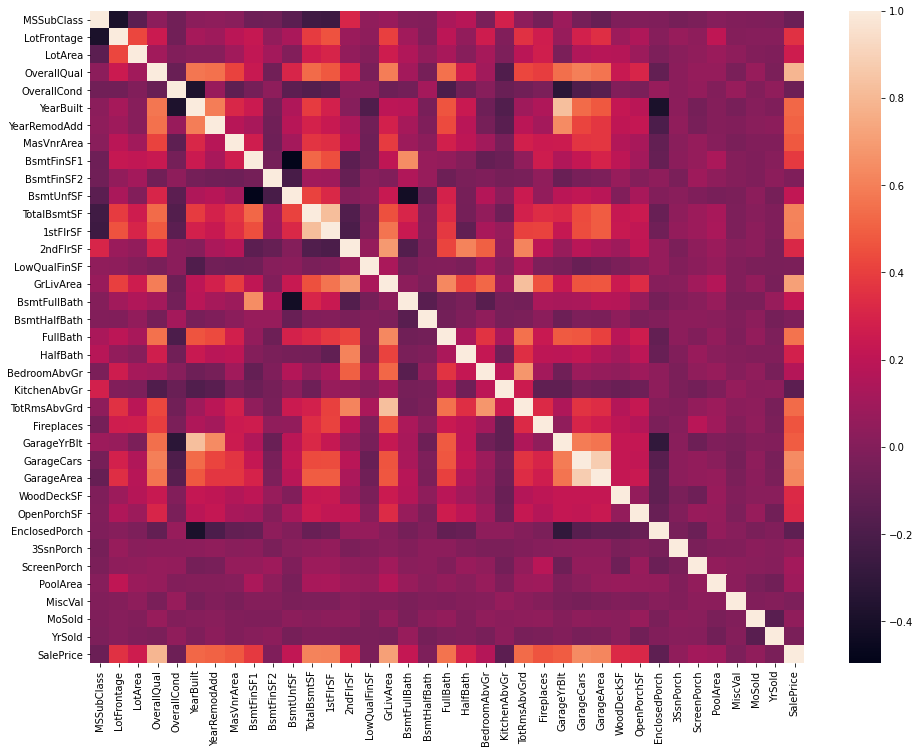

In [13]:
# correlation matrix
corr_mat = train_data.corr()
print(corr_mat.shape)
fig, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(corr_mat);

In [14]:
corr_mat['SalePrice']

MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
Name: SalePrice, dtype: float64

In [15]:
print(corr_mat['SalePrice'].sort_values(ascending=False))

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


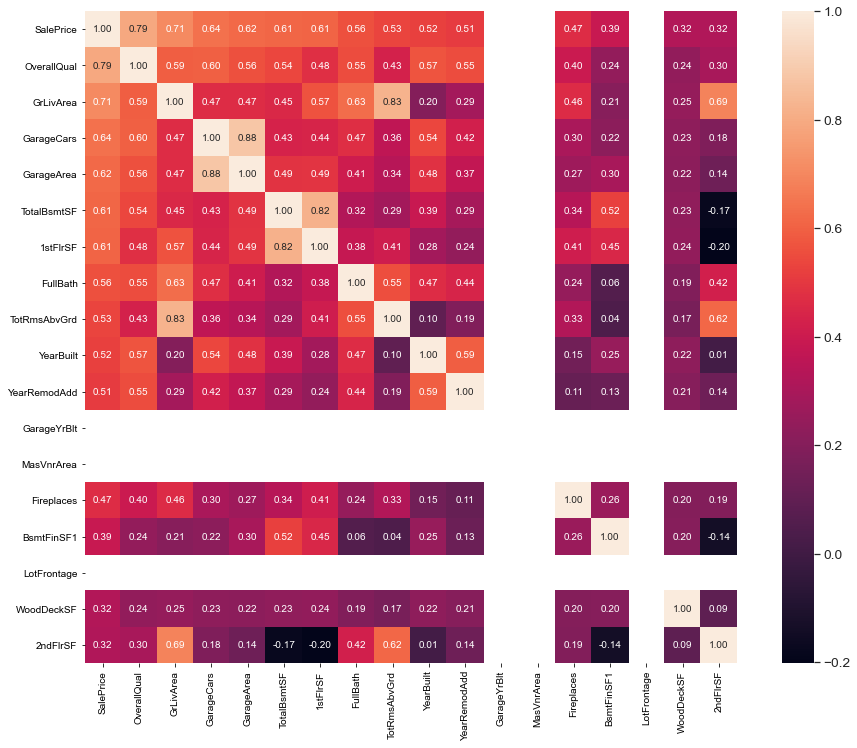

In [16]:
# look closer
k = 18
cols = corr_mat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_data[cols].values.T)
fig, ax = plt.subplots(figsize=(16, 12))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Note: 'GarageYrBlt', 'MasVnrArea', 'LotFrontAge'

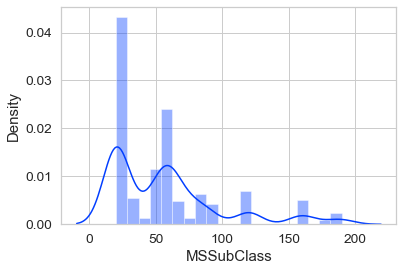

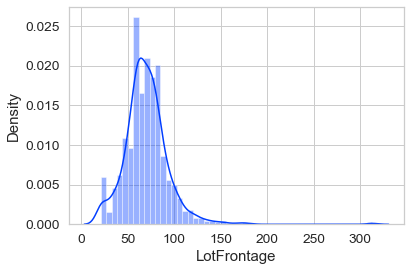

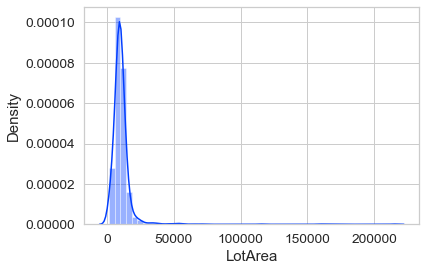

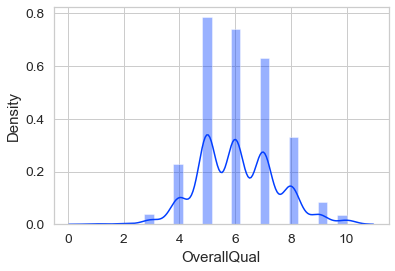

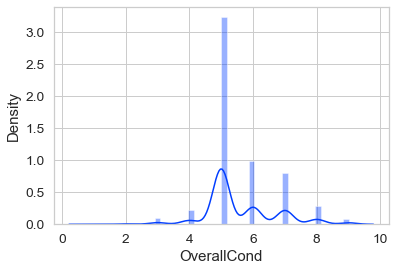

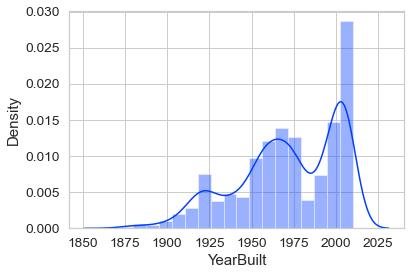

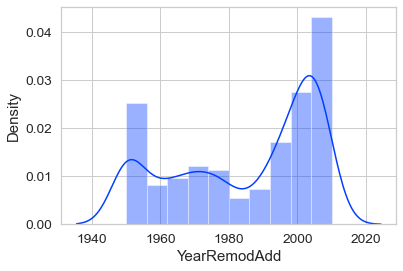

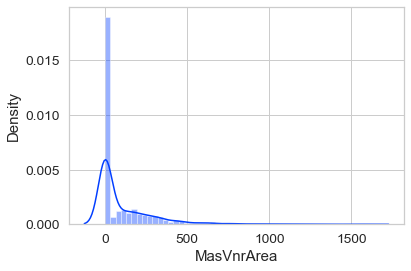

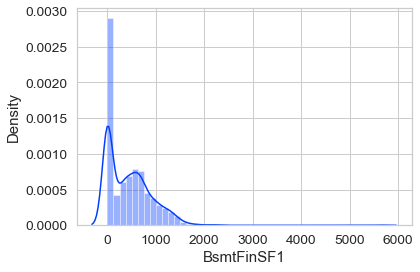

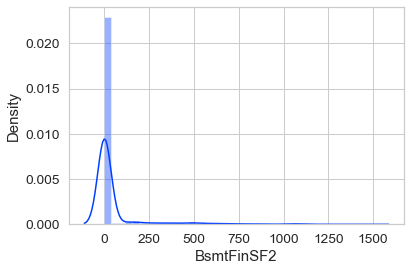

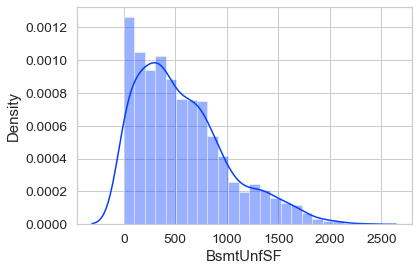

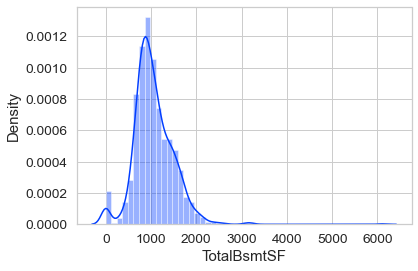

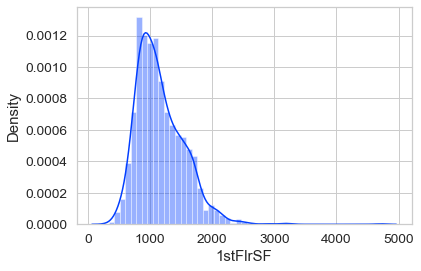

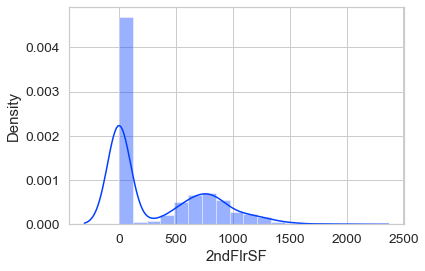

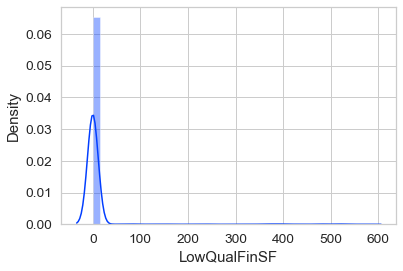

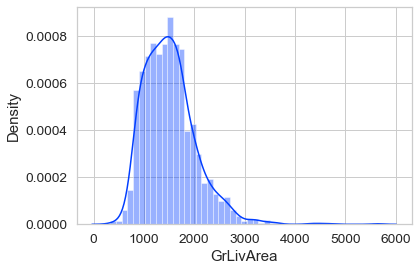

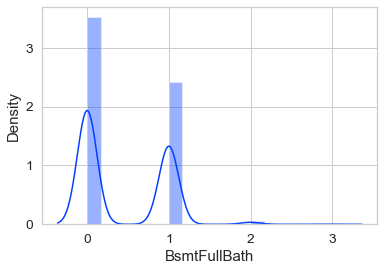

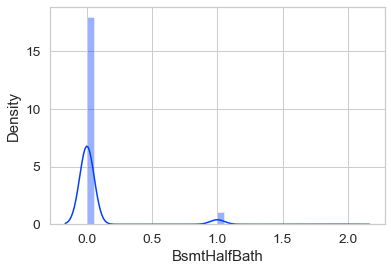

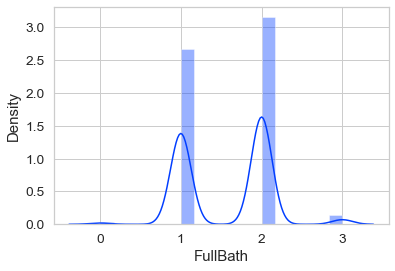

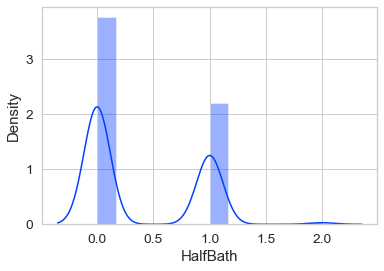

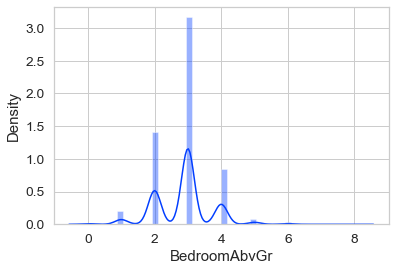

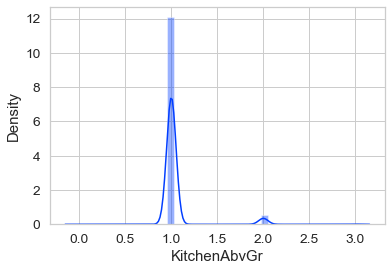

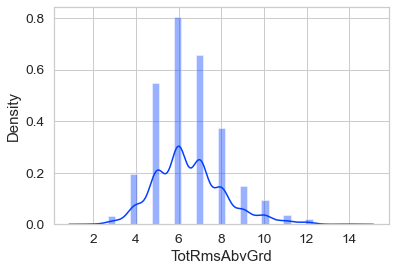

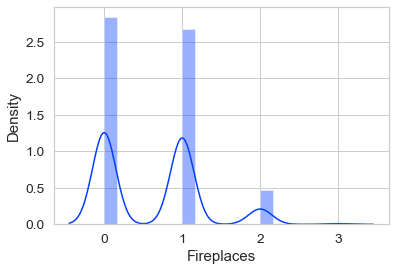

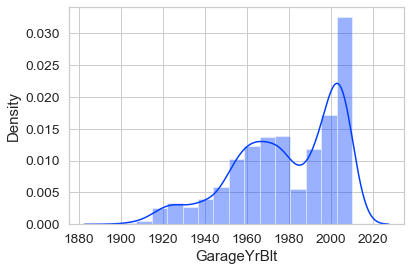

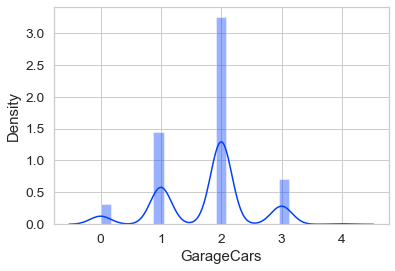

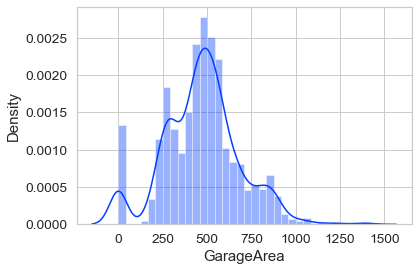

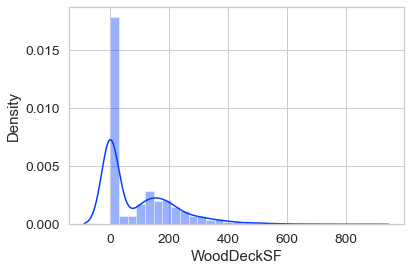

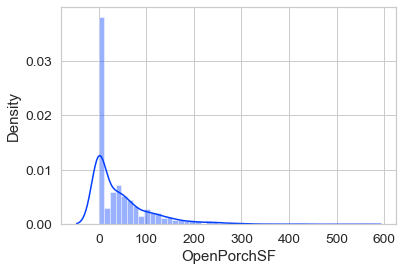

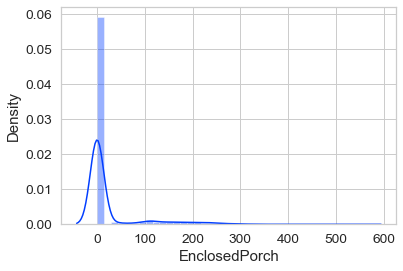

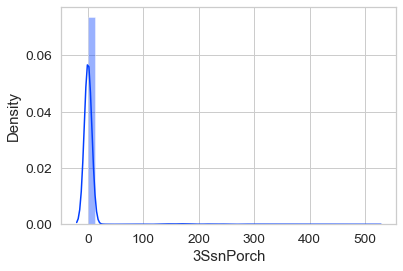

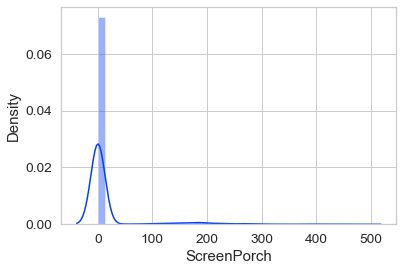

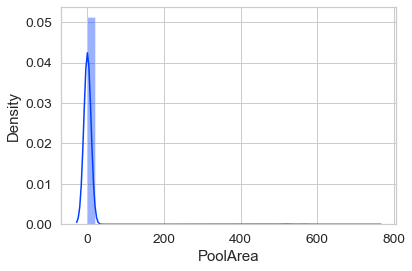

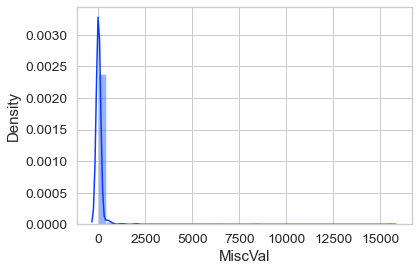

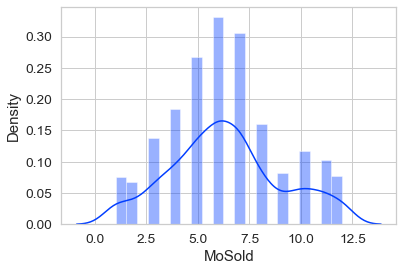

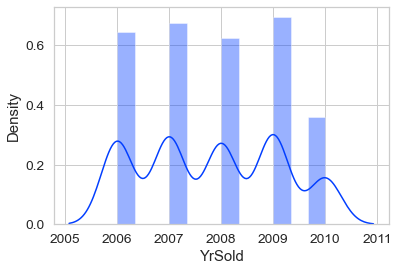

In [17]:
# Take a look of numerical feature distribution
sns.set_style('whitegrid')
sns.set_palette(sns.color_palette('bright'))

for num_feature in train_numerical_features:
    sns.distplot(train_data[num_feature].dropna())
    plt.show()

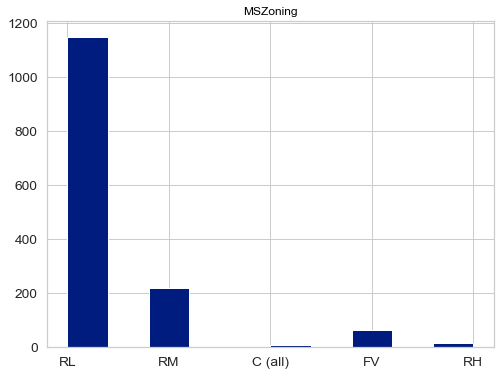

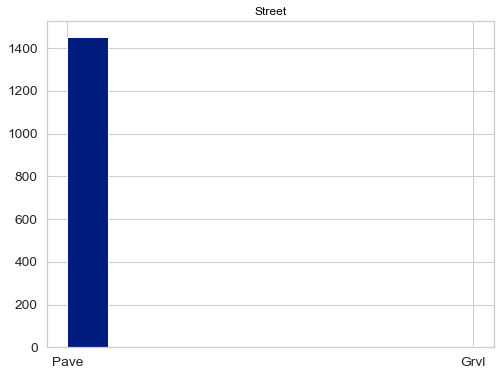

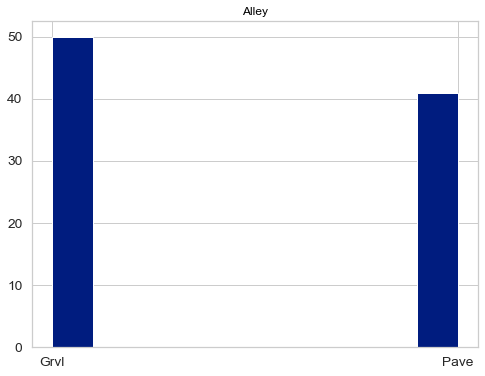

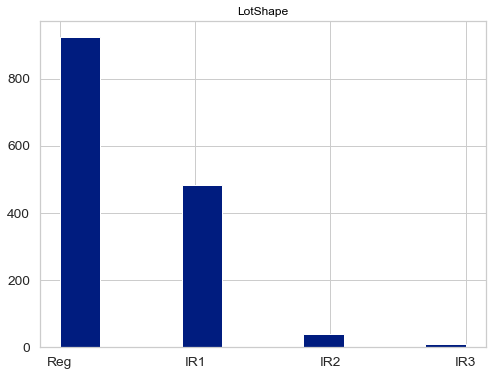

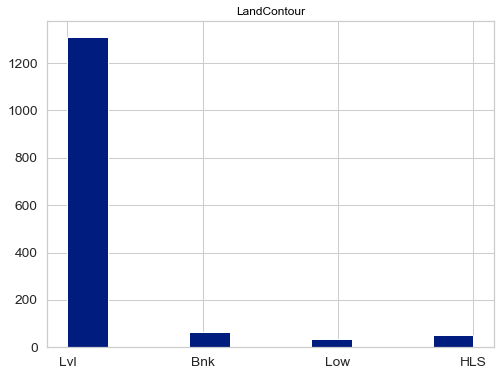

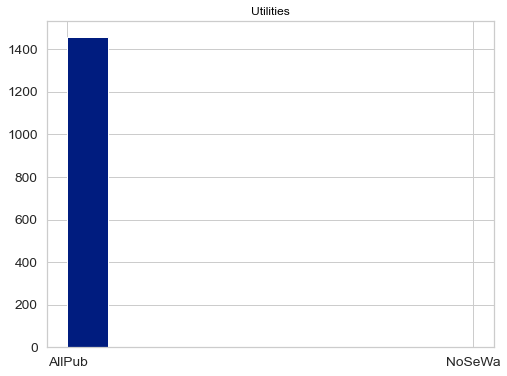

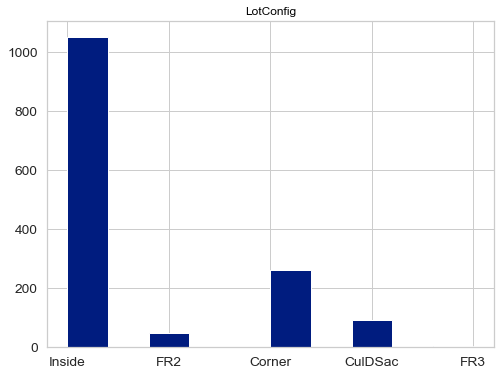

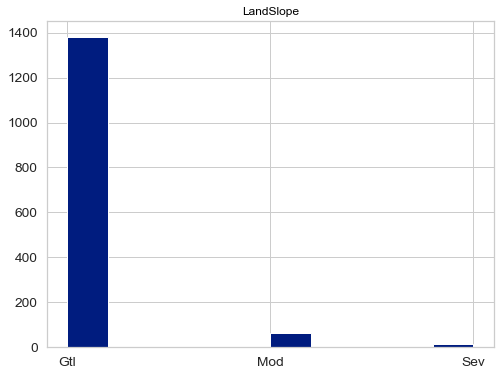

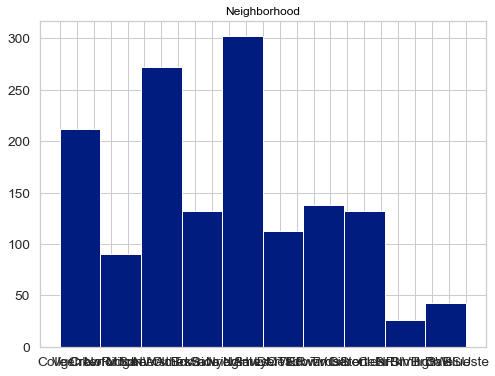

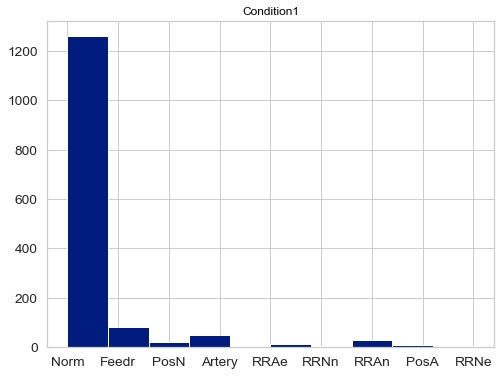

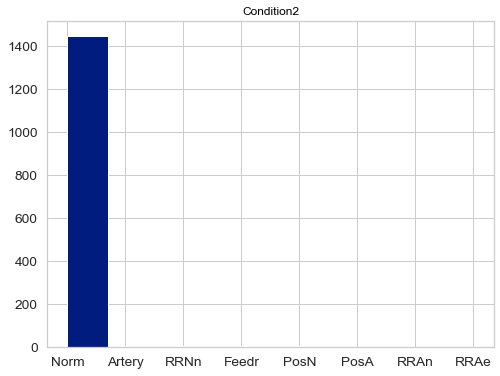

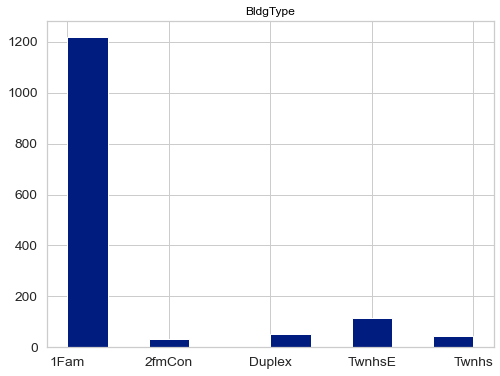

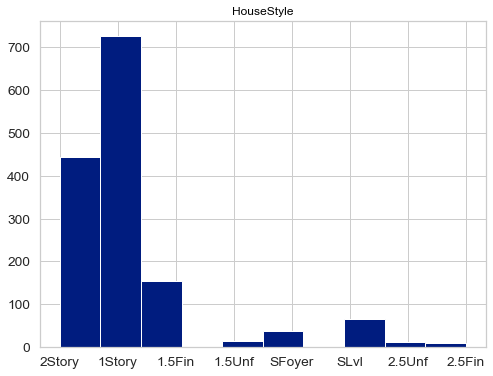

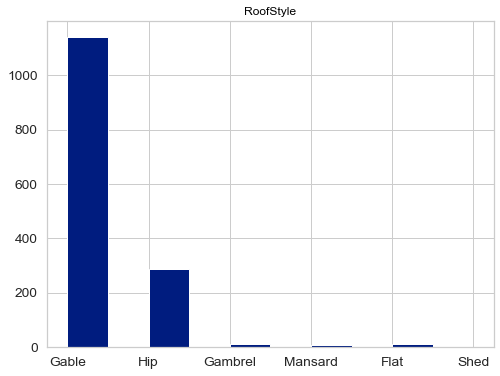

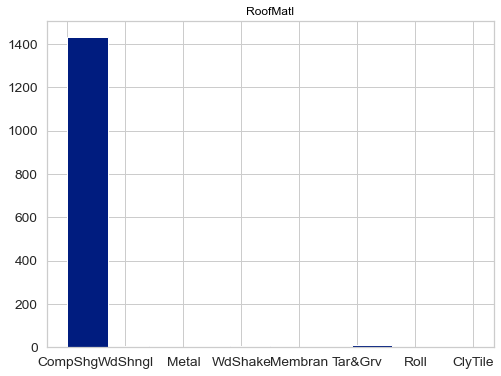

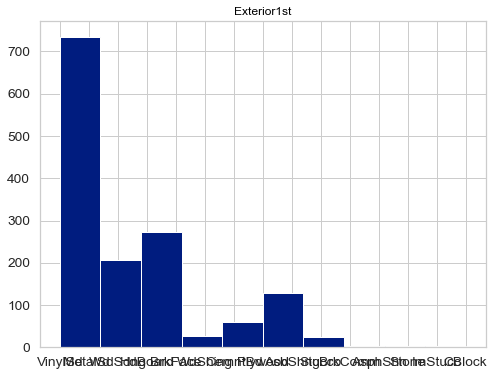

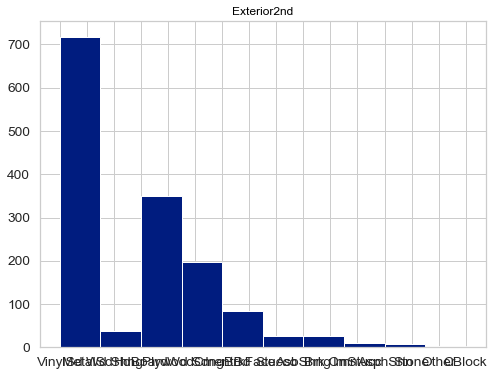

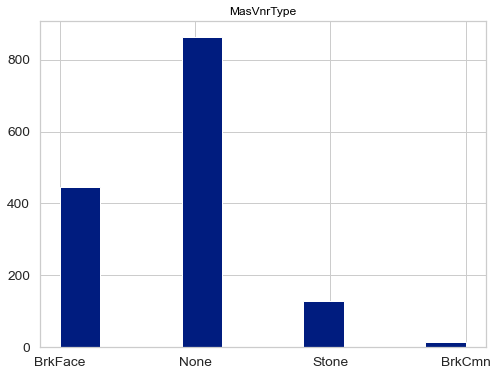

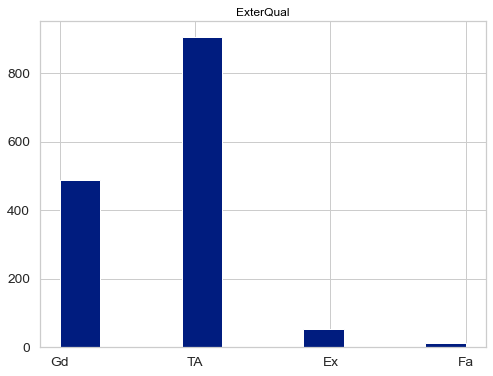

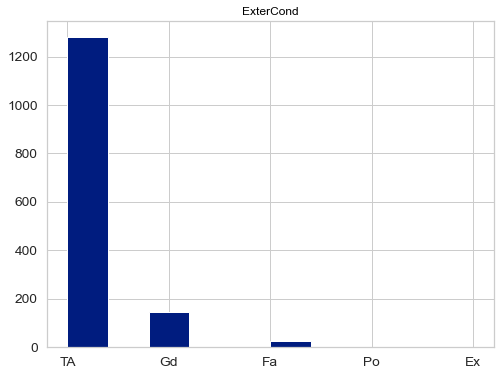

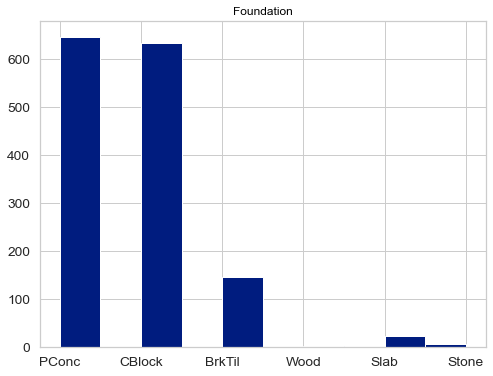

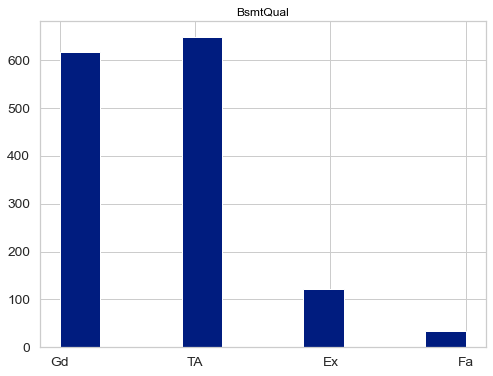

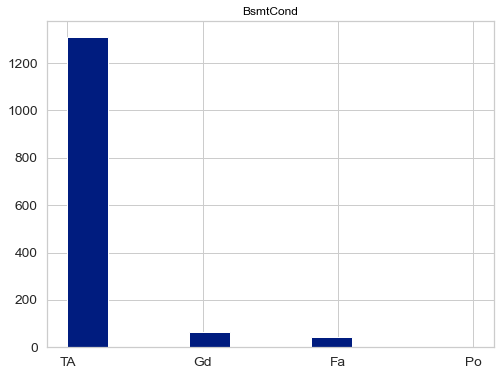

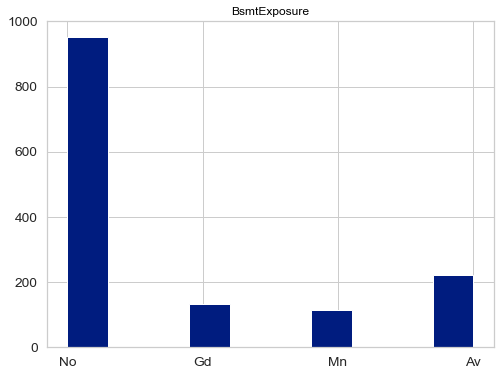

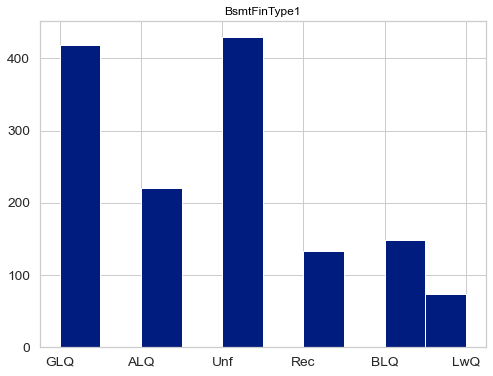

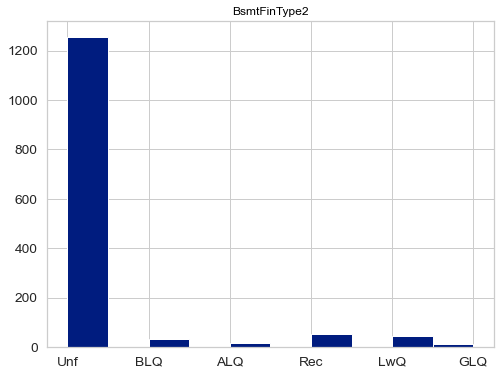

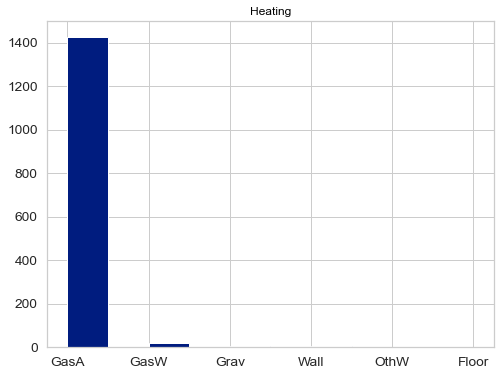

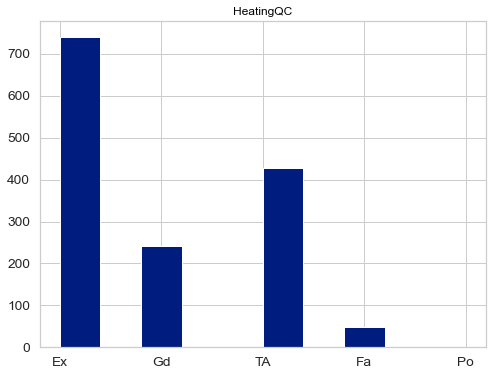

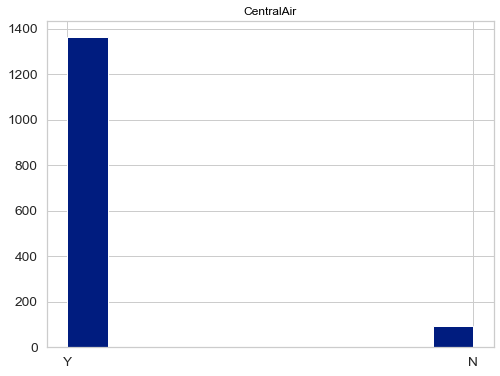

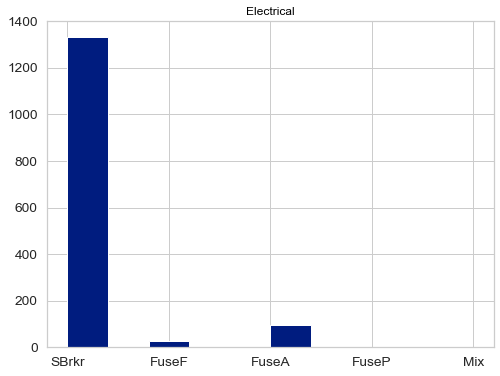

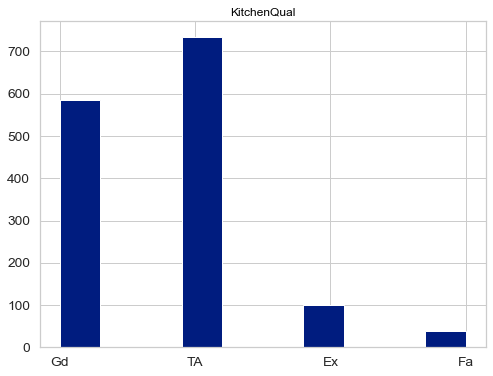

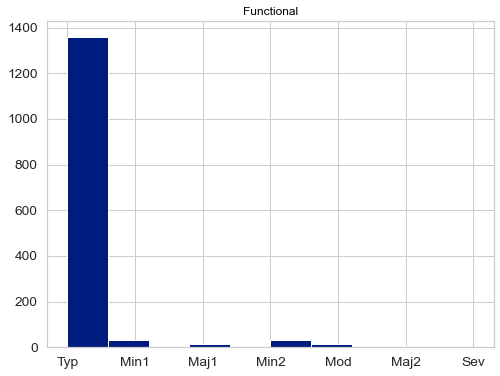

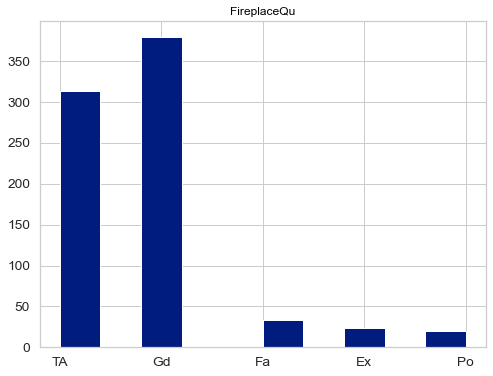

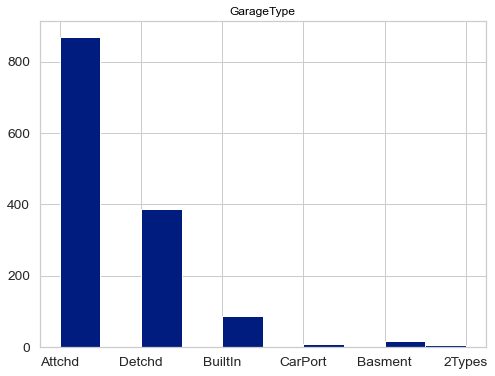

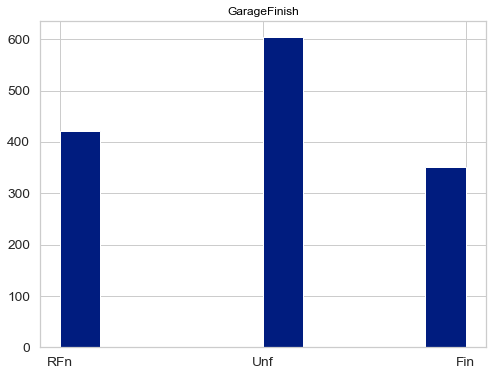

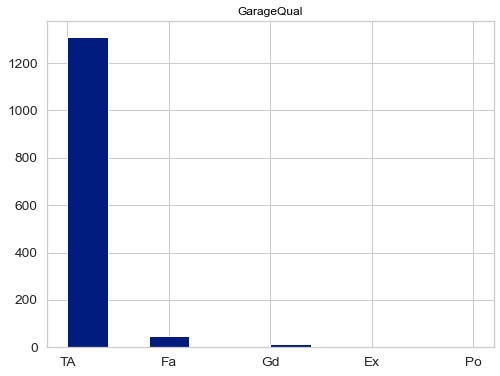

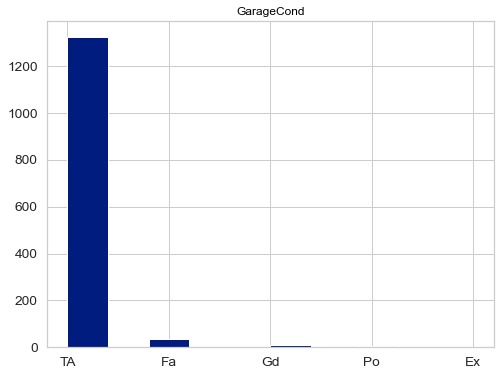

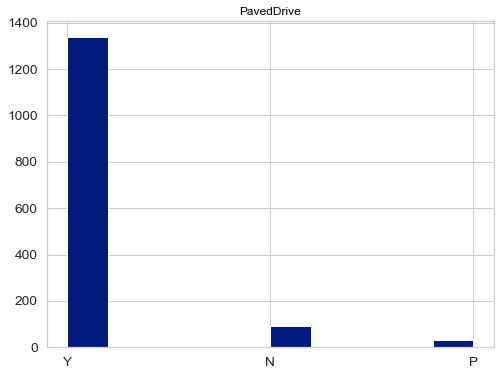

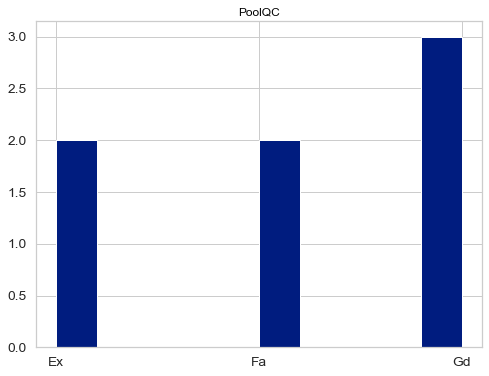

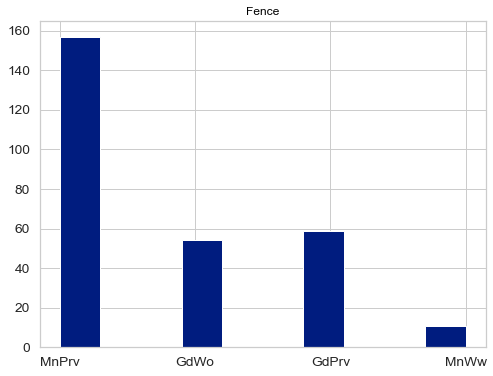

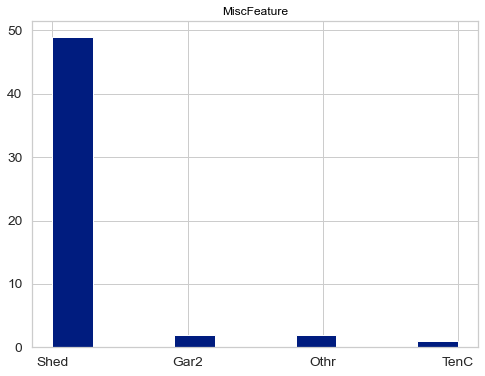

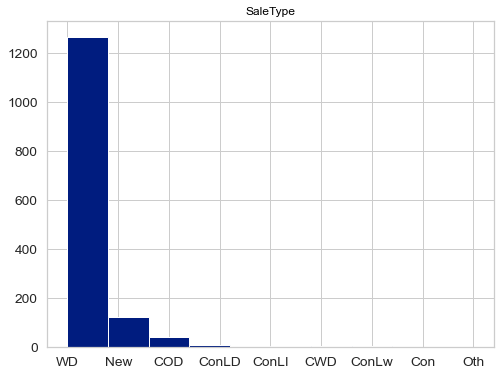

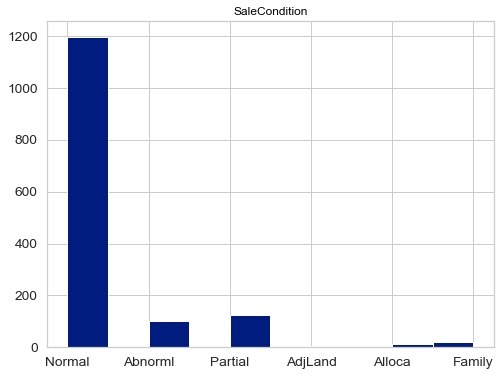

In [18]:
# Take a look of categorical feature distribution
sns.set_palette(sns.color_palette('dark'))
for cat_feature in train_categorical_features:
    fig, ax = plt.subplots(figsize=(8, 6)) 
    ax.hist(train_categorical[cat_feature].dropna())
    ax.set_title(cat_feature, fontsize=12,color='Black')
    plt.show()

## Step 2: Preprocessing

### Handle Missing Value

In [19]:
train_missing = train_data.isnull().sum().sort_values(ascending=False)
train_missing_mean = train_data.isnull().mean()
train_missing = train_missing[train_missing != 0]
percent = train_missing_mean.sort_values(ascending=False) * 100
train_missing_sort = pd.concat([train_missing, percent], axis=1, keys=['Number of missing data', 'Percent(%)'])
train_missing_sort.head(20)

,Number of missing data,Percent(%)
PoolQC,1453.0,99.520548
MiscFeature,1406.0,96.301370
Alley,1369.0,93.767123
Fence,1179.0,80.753425
FireplaceQu,690.0,47.260274
LotFrontage,259.0,17.739726
GarageYrBlt,81.0,5.547945
GarageCond,81.0,5.547945
GarageType,81.0,5.547945
GarageFinish,81.0,5.547945


In [20]:
train_missing_features = train_missing.index
train_missing_features
print("Number of features with missing values on training set: ", len(train_missing_features))

Number of features with missing values on training set:  19


Text(0.5, 1.0, 'Missing training data by feature')

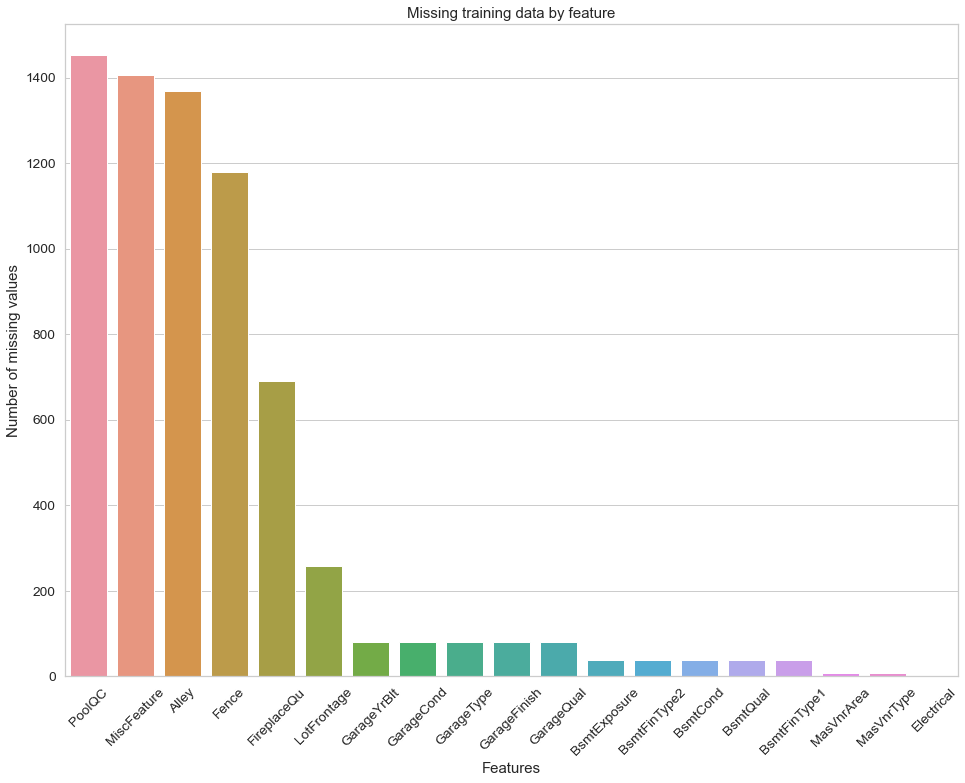

In [21]:
f, ax = plt.subplots(figsize=(16, 12))
plt.xticks(rotation='45')
sns.barplot(x=train_missing.index, y=train_missing)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Number of missing values', fontsize=15)
plt.title('Missing training data by feature', fontsize=15)

In [22]:
test_missing = test_data.isnull().sum().sort_values(ascending=False)
test_missing_mean = test_data.isnull().mean()
test_missing = test_missing[test_missing != 0]
percent = test_missing_mean.sort_values(ascending=False) * 100
test_missing_sort = pd.concat([test_missing, percent], axis=1, keys=['Number of missing data', 'Percent(%)'])
test_missing_sort.head(20)

,Number of missing data,Percent(%)
PoolQC,1456.0,99.794380
MiscFeature,1408.0,96.504455
Alley,1352.0,92.666210
Fence,1169.0,80.123372
FireplaceQu,730.0,50.034270
LotFrontage,227.0,15.558602
GarageYrBlt,78.0,5.346127
GarageFinish,78.0,5.346127
GarageQual,78.0,5.346127
GarageCond,78.0,5.346127


In [23]:
test_missing_features = test_missing.index
test_missing_features
print("Number of features with missing values on test set: ", len(test_missing_features))

Number of features with missing values on test set:  33


Text(0.5, 1.0, 'Missing test data by feature')

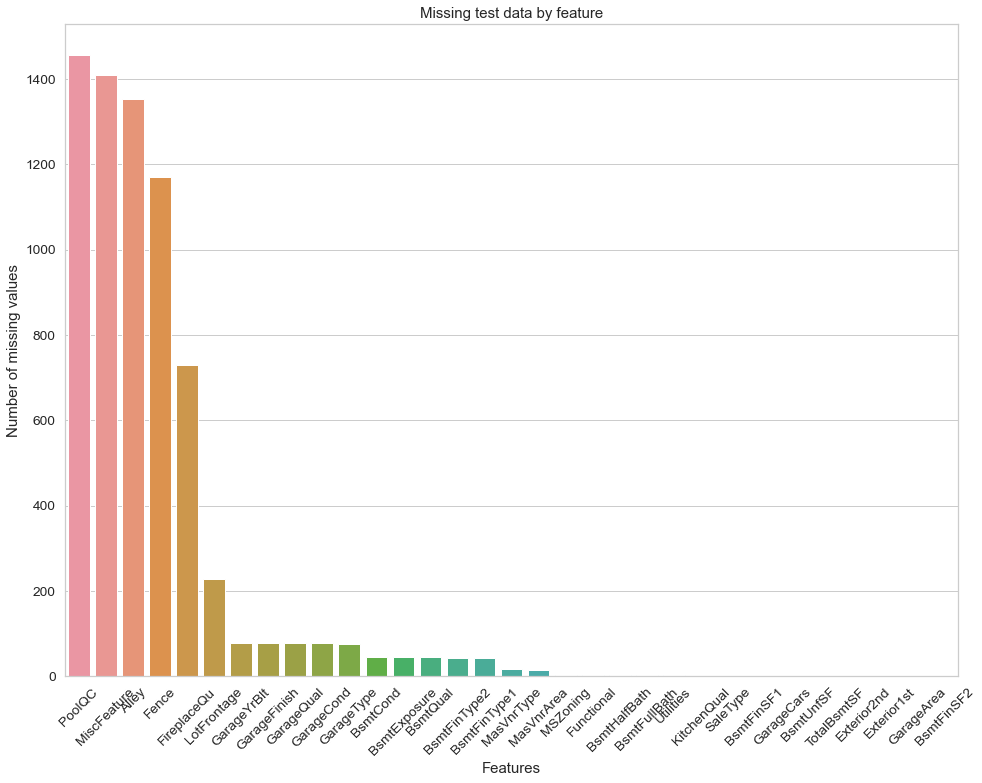

In [24]:
f, ax = plt.subplots(figsize=(16, 12))
plt.xticks(rotation='45')
sns.barplot(x=test_missing.index, y=test_missing)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Number of missing values', fontsize=15)
plt.title('Missing test data by feature', fontsize=15)

In [25]:
# train_numerical = train_data.select_dtypes(['int64', 'float64']) # include target
train_numerical_missing_features = set(train_numerical_features) & set(train_missing_features)
train_numerical_missing_features

{'GarageYrBlt', 'LotFrontage', 'MasVnrArea'}

In [26]:
test_numerical_missing_cols = set(test_numerical_features) & set(test_missing_features)
test_numerical_missing_cols

{'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtUnfSF',
 'GarageArea',
 'GarageCars',
 'GarageYrBlt',
 'LotFrontage',
 'MasVnrArea',
 'TotalBsmtSF'}

In [27]:
train_categorical_missing_cols = set(train_categorical_features) & set(train_missing_features)
train_categorical_missing_cols

{'Alley',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtQual',
 'Electrical',
 'Fence',
 'FireplaceQu',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'GarageType',
 'MasVnrType',
 'MiscFeature',
 'PoolQC'}

In [28]:
# Drop features_with_many_missing on training data
features_with_many_missing = ['PoolQC', 'MiscFeature', 'Alley', 'Fence']

train_categorical_to_remove = train_categorical_missing_cols & set(features_with_many_missing)
print(train_categorical_to_remove)

train_categorical = train_categorical.drop(list(train_categorical_to_remove), axis=1)
print(train_categorical.columns)

print("Number of categorical features on training set after dropping 4 columns: ", len(train_categorical.columns))

{'PoolQC', 'MiscFeature', 'Alley', 'Fence'}
Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')
Number of categorical features on training set after dropping 4 columns:  39


In [29]:
test_categorical_missing_cols = set(test_categorical_features) & set(test_missing_features)
test_categorical_missing_cols

{'Alley',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtQual',
 'Exterior1st',
 'Exterior2nd',
 'Fence',
 'FireplaceQu',
 'Functional',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'GarageType',
 'KitchenQual',
 'MSZoning',
 'MasVnrType',
 'MiscFeature',
 'PoolQC',
 'SaleType',
 'Utilities'}

In [30]:
# Drop features_with_many_missing on test data
features_with_many_missing = ['PoolQC', 'MiscFeature', 'Alley', 'Fence']

test_categorical_to_remove = test_categorical_missing_cols & set(features_with_many_missing)
print(test_categorical_to_remove)

test_categorical = test_categorical.drop(list(test_categorical_to_remove), axis=1)
print(test_categorical.columns)

{'PoolQC', 'MiscFeature', 'Alley', 'Fence'}
Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')


In [31]:
train_missing_features = set(train_missing_features) - set(features_with_many_missing)
train_missing_features = list(train_missing_features)
len(train_missing_features)

15

In [32]:
test_missing_features = set(test_missing_features) - set(features_with_many_missing)
test_missing_features = list(test_missing_features)
len(test_missing_features)

29

In [33]:
# For reamining numerical features

# LotFrontage: Linear feet of street connected to property: 怕有人亂填 取中位數避免
train_numerical['LotFrontage'] = train_numerical["LotFrontage"].fillna(train_numerical["LotFrontage"].median())
test_numerical['LotFrontage'] = test_numerical.fillna(train_numerical['LotFrontage'].median())

# MasVnrArea: Masonry veneer area in square feet, assume 0
train_numerical["MasVnrArea"] = train_numerical["MasVnrArea"].fillna(0)
test_numerical["MasVnrArea"] = test_numerical["MasVnrArea"].fillna(0)

# GarageYrBlt: Year garage was built
train_numerical["GarageYrBlt"] = train_numerical["GarageYrBlt"].fillna(train_numerical["GarageYrBlt"].median())
test_numerical["GarageYrBlt"] = test_numerical["GarageYrBlt"].fillna(train_numerical["GarageYrBlt"].median())
print(train_numerical['GarageYrBlt'].isnull().sum())
print(test_numerical['GarageYrBlt'].isnull().sum())

# other numerical features: fill in 0
for col in train_numerical.columns:
    train_numerical[col] = train_numerical[col].fillna(0)
for col in test_numerical.columns:
    test_numerical[col] = test_numerical[col].fillna(0)

0
0


In [34]:
train_numerical.isnull().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

In [35]:
test_numerical.isnull().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

In [36]:
# For categorical features
for col in train_categorical.columns:
    train_categorical[col] = train_categorical[col].fillna('none')

for col in test_categorical.columns:
    test_categorical[col] = test_categorical[col].fillna('none')

In [37]:
train_categorical.isnull().sum()

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64

In [38]:
test_categorical.isnull().sum()

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64

In [39]:
# Strange distribution: consider in the future

train_categorical = train_categorical.drop(['Utilities'], axis=1)
test_categorical = test_categorical.drop(['Utilities'], axis=1)

In [40]:
print("Train numerical size: ", train_numerical.shape)
print("Train categorical size: ", train_categorical.shape)

print("Test numerical size: ", test_numerical.shape)
print("Test categorical size: ", test_categorical.shape)

Train numerical size:  (1460, 36)
Train categorical size:  (1460, 38)
Test numerical size:  (1459, 36)
Test categorical size:  (1459, 38)


### Outliers and Scaling

In [41]:
train_numerical.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,548,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,460,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,608,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,642,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,836,192,84,0,0,0,0,0,12,2008


In [42]:
# RobustScaler: Scale features using statistics that are robust to outliers.
from sklearn.preprocessing import RobustScaler



## Feature Engineering

In [43]:
train_numerical.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

                    Skew
MiscVal        24.451640
PoolArea       14.813135
LotArea        12.195142
3SsnPorch      10.293752
LowQualFinSF    9.002080
BsmtFinSF2      4.250888
ScreenPorch     4.117977
EnclosedPorch   3.086696
MasVnrArea      2.674865
OpenPorchSF     2.361912
BsmtFinSF1      1.683771
WoodDeckSF      1.539792
TotalBsmtSF     1.522688
1stFlrSF        1.375342
GrLivArea       1.365156
BsmtUnfSF       0.919323
2ndFlrSF        0.812194
GarageArea      0.179796


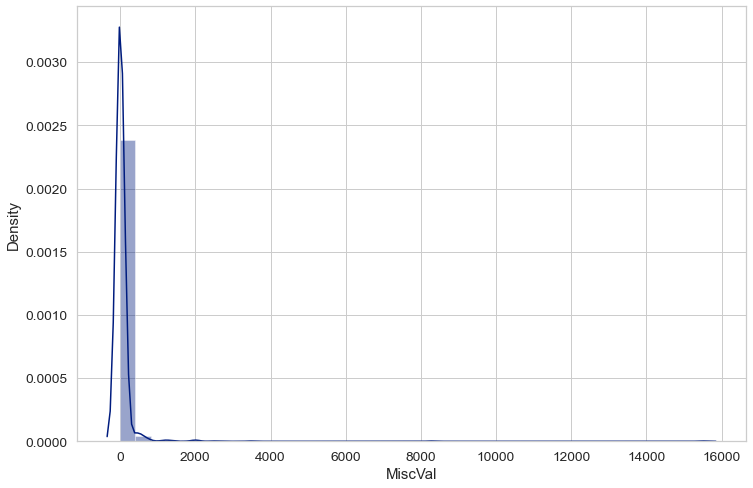

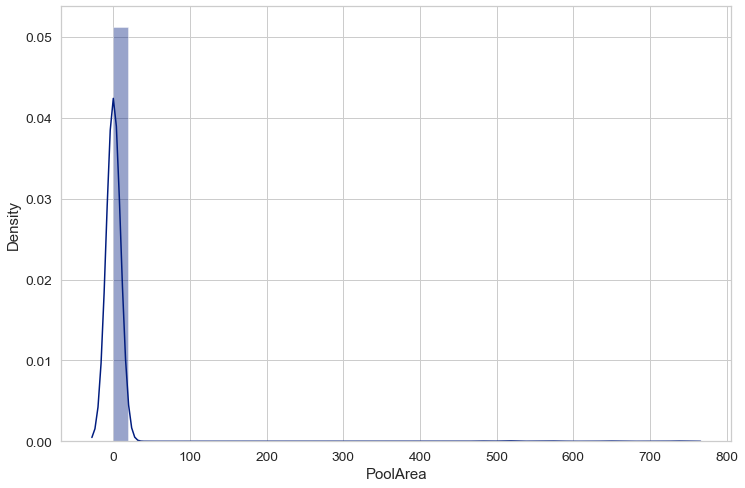

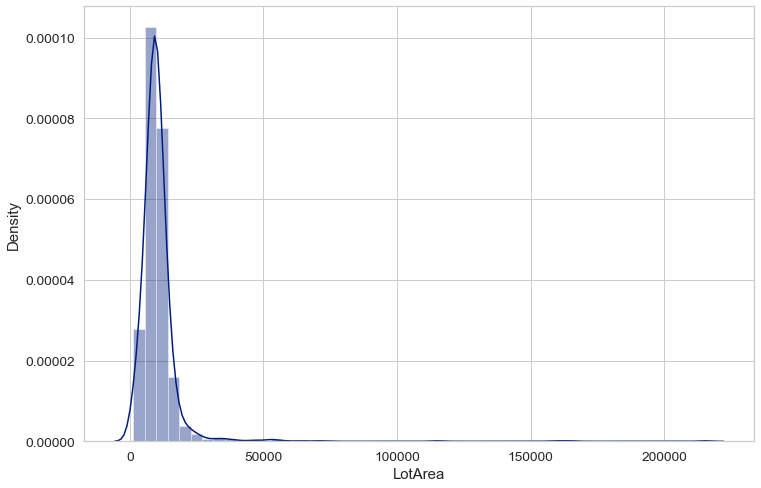

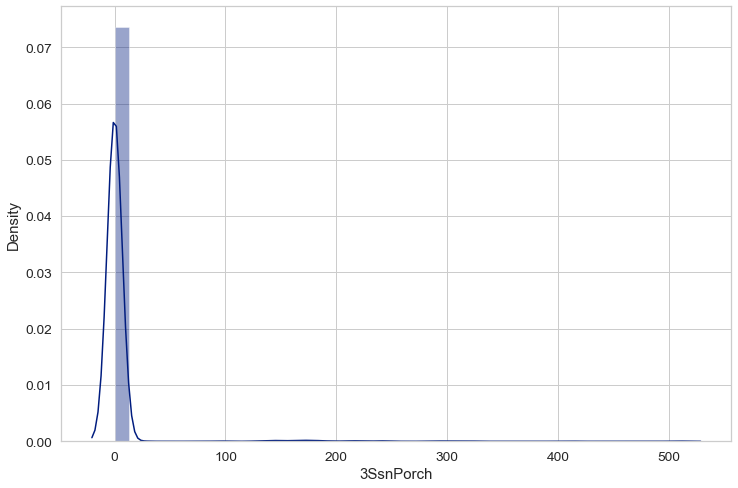

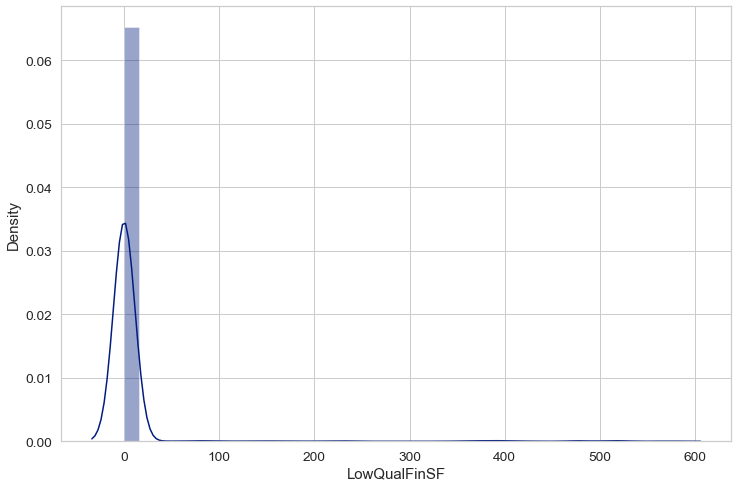

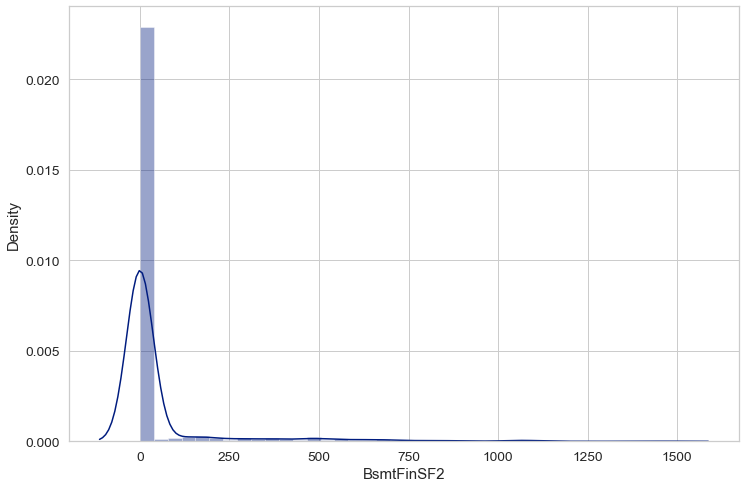

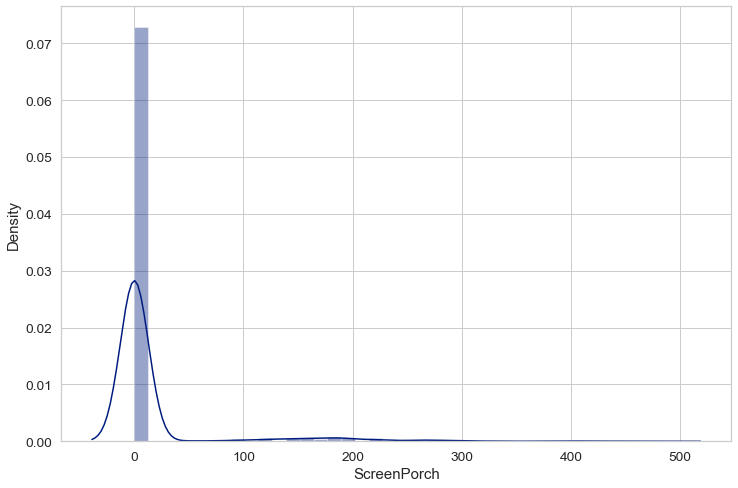

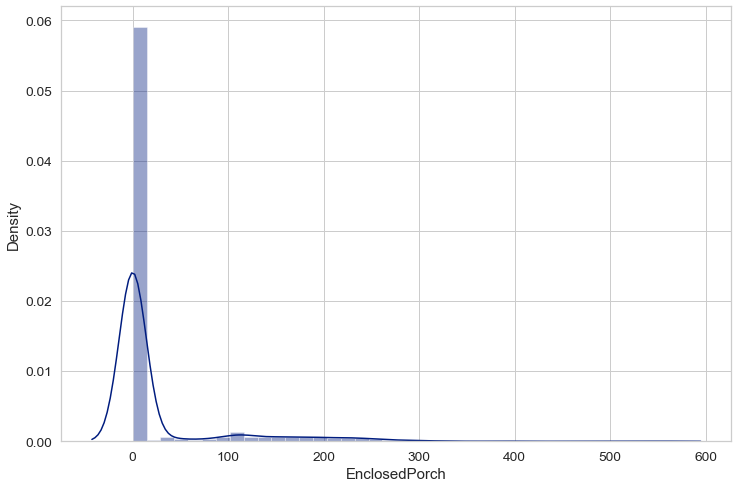

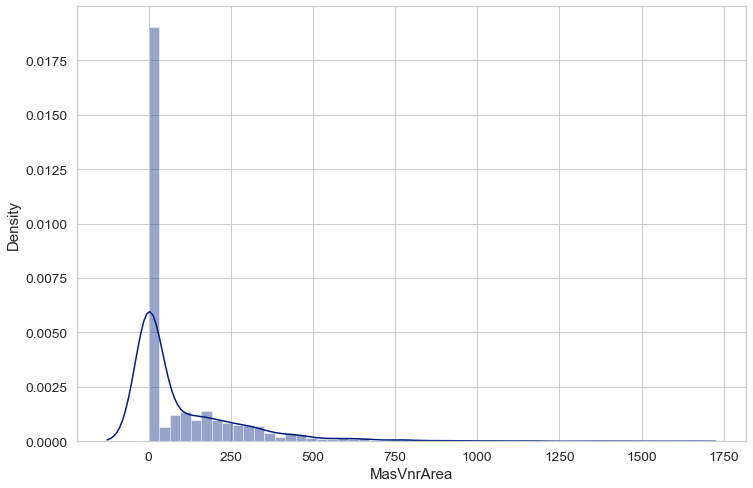

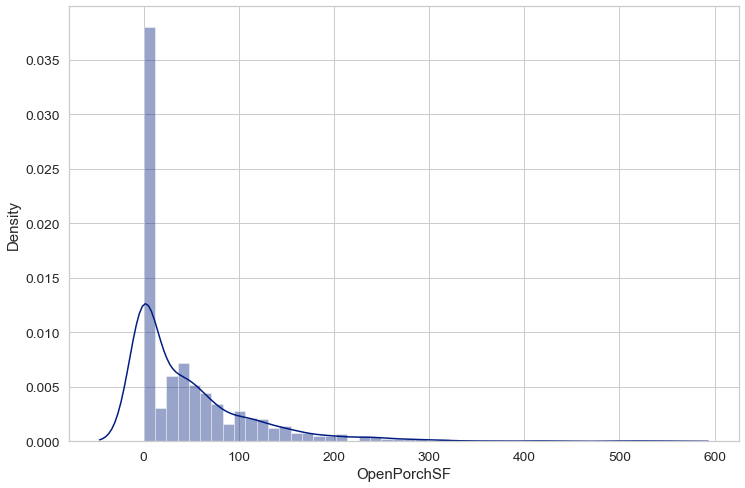

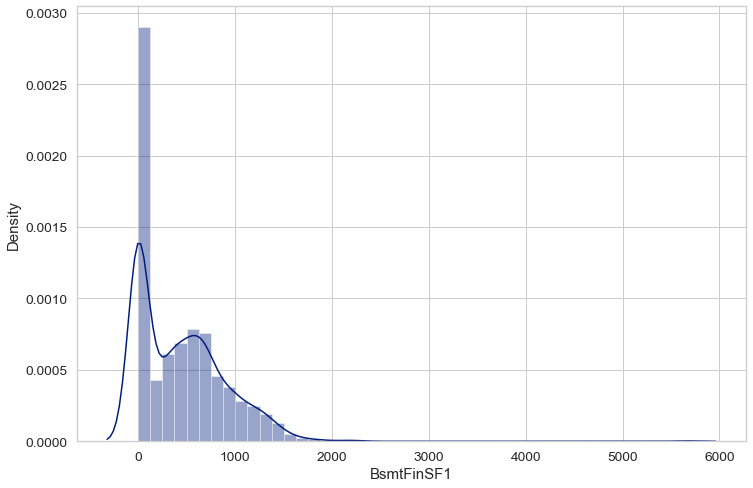

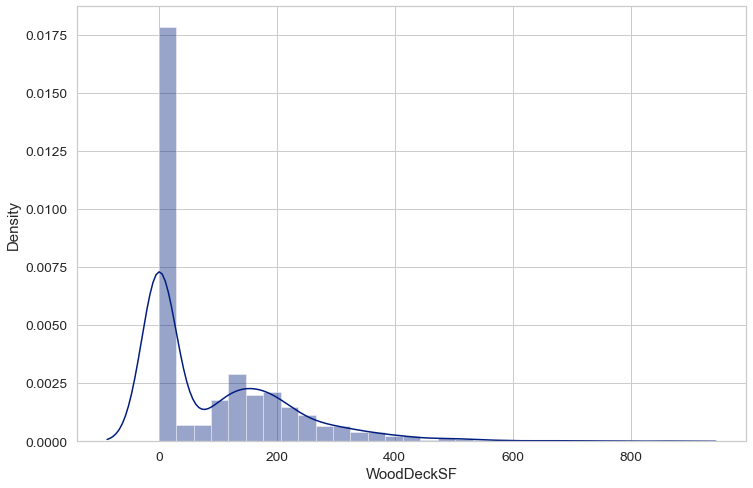

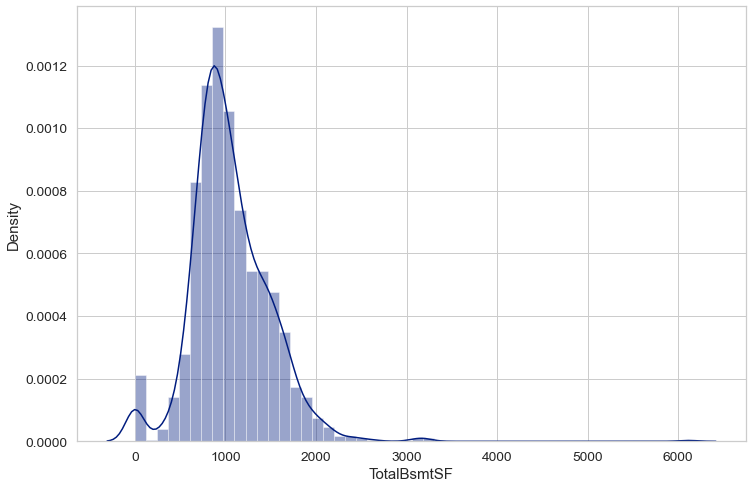

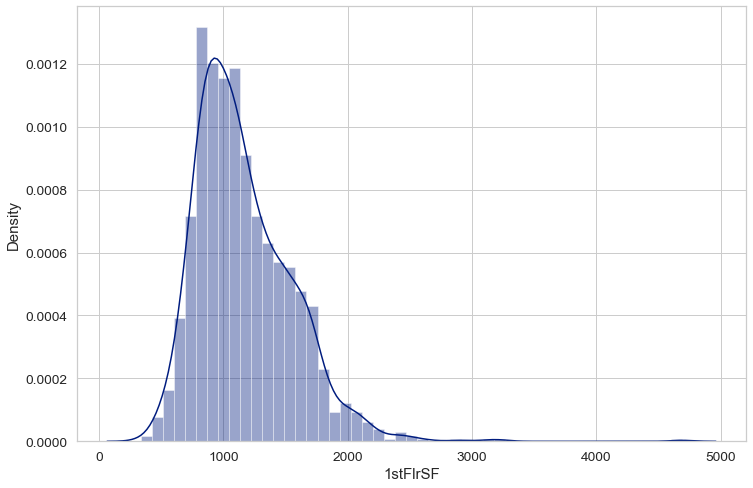

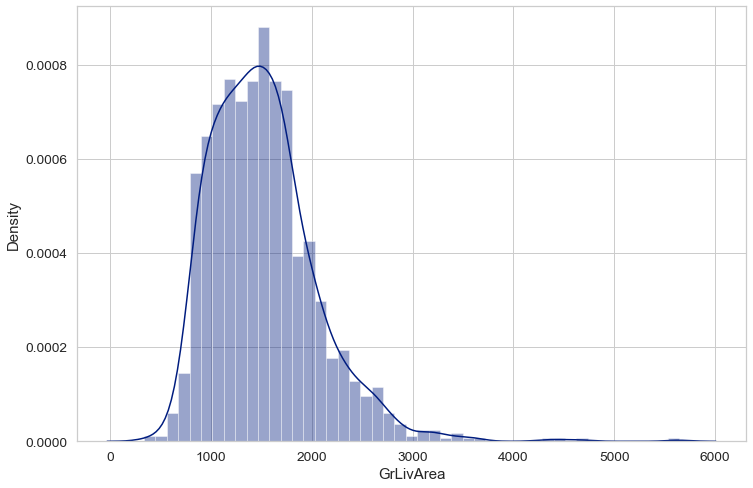

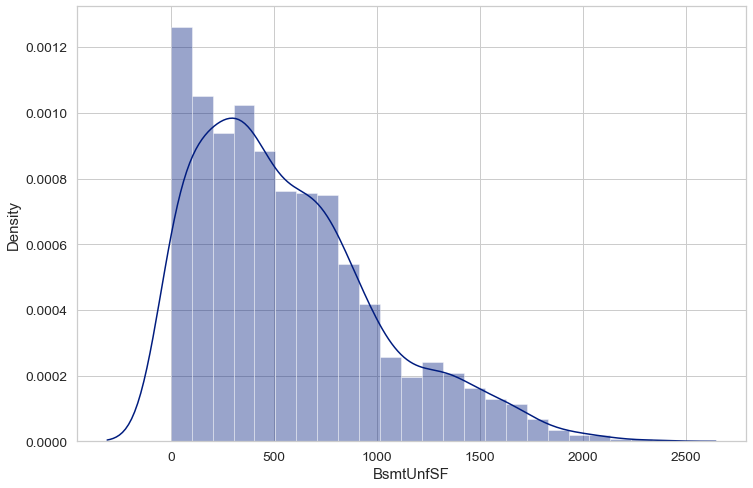

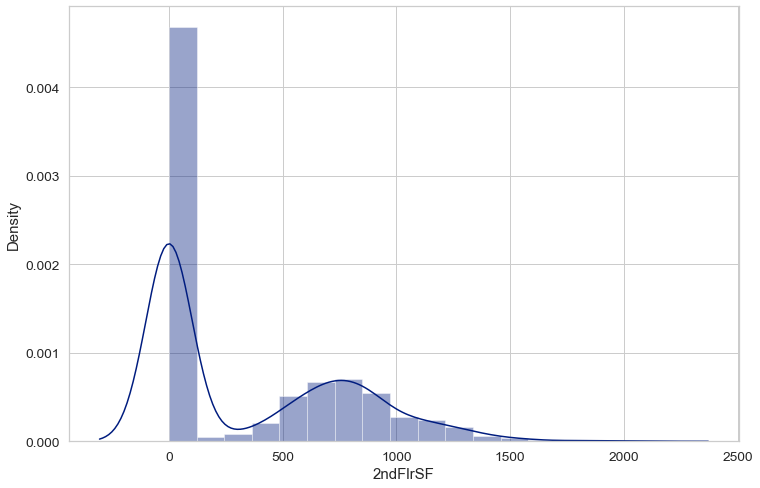

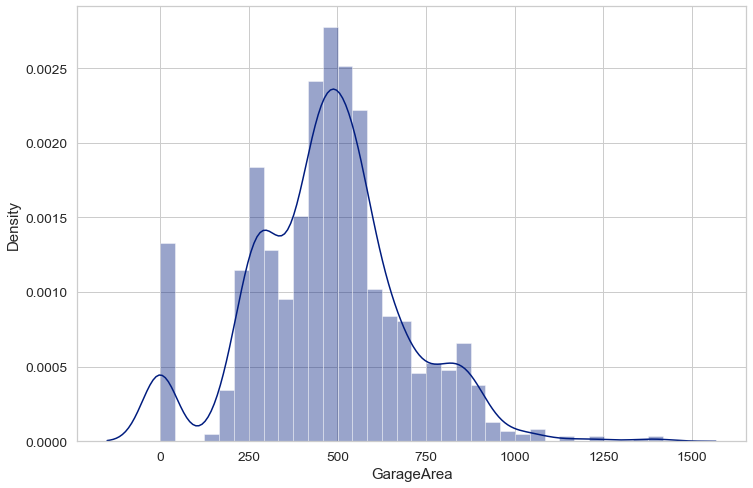

In [44]:
# Check the skewness of all numerical features
skewed_features = train_numerical[['MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF', '1stFlrSF',
                            '2ndFlrSF','LowQualFinSF','GarageArea','WoodDeckSF', 'OpenPorchSF','EnclosedPorch',
                            '3SsnPorch','ScreenPorch','GrLivArea', 'LotArea','PoolArea','MiscVal']].apply(lambda x: skew(x)).sort_values(ascending=False)

skewness = pd.DataFrame({'Skew' :skewed_features})
print(skewness)

for col in skewness.index:
    f, ax = plt.subplots(figsize=(12, 8))
    sns.distplot(train_numerical[col])
    plt.show()

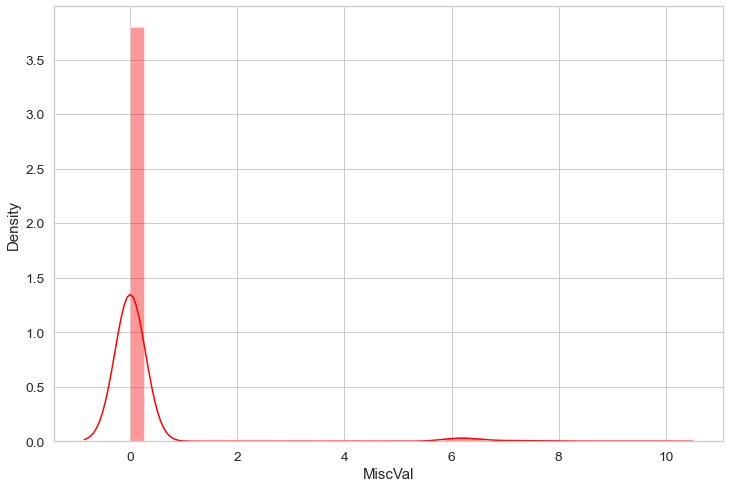

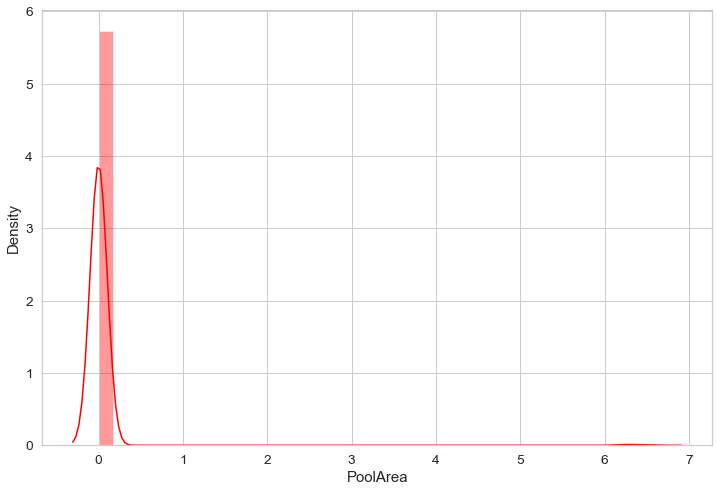

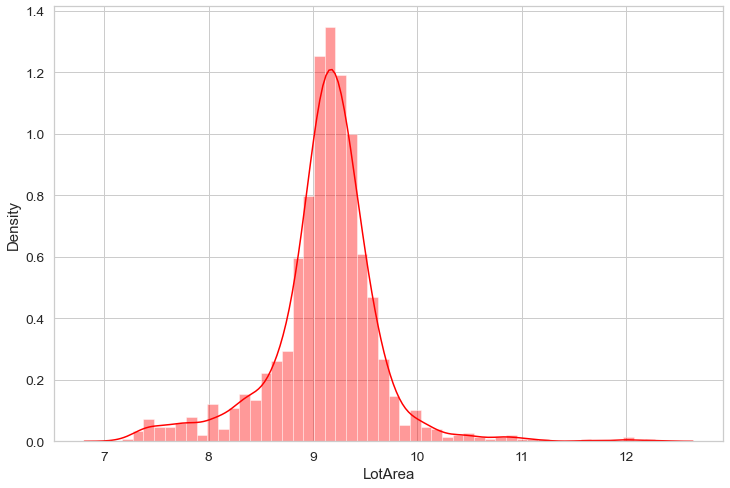

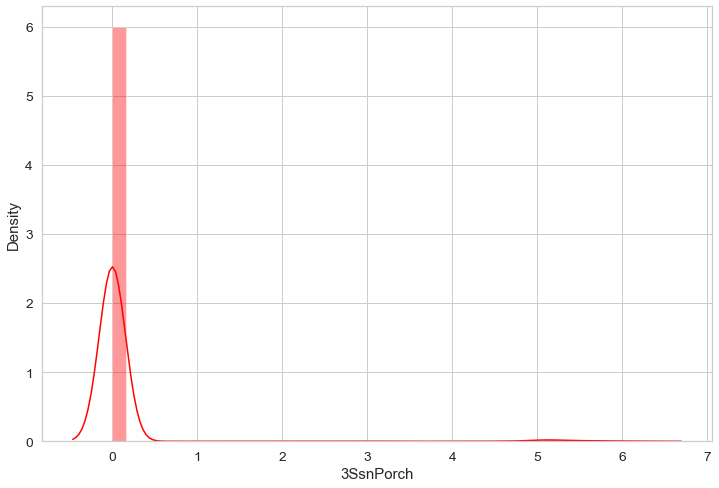

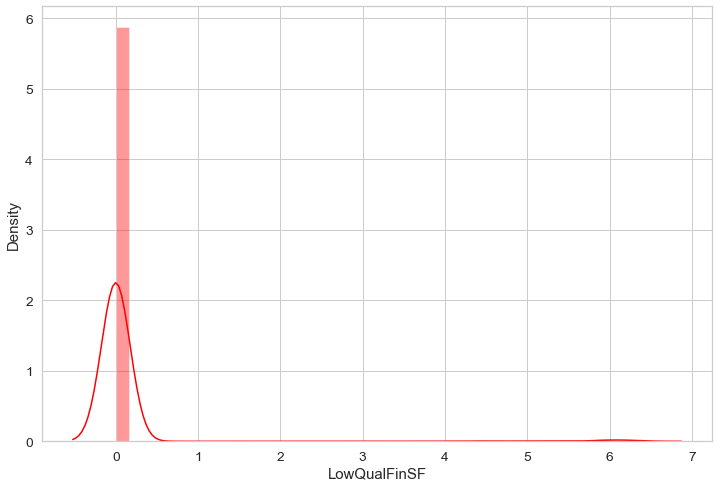

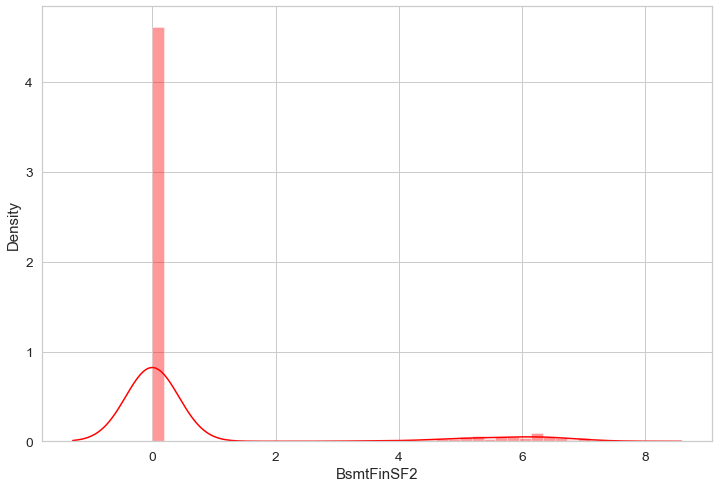

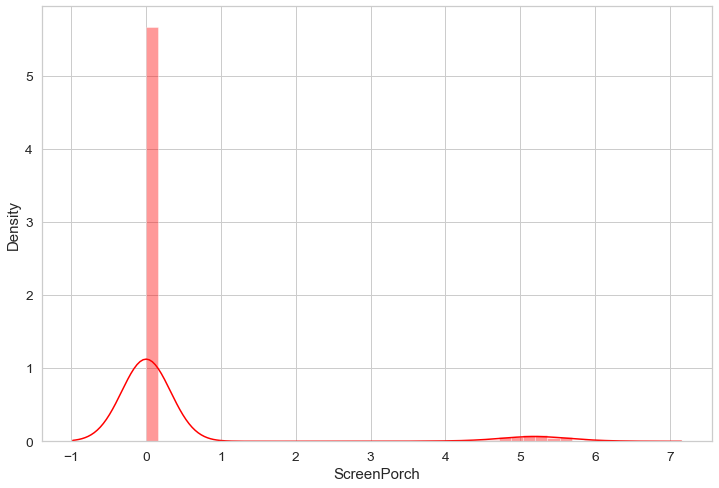

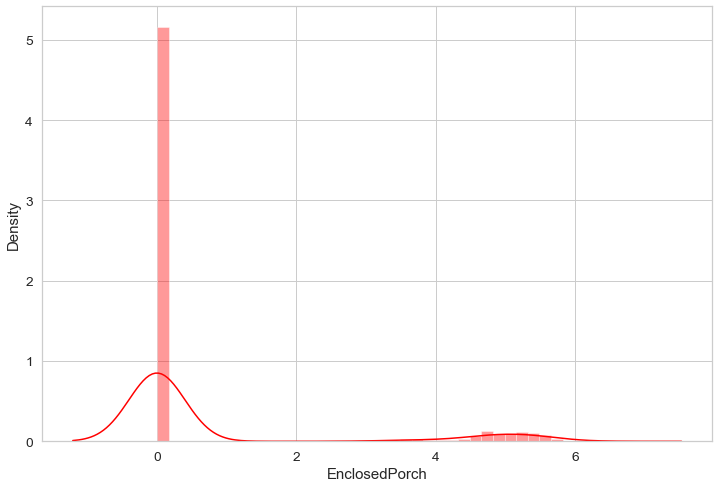

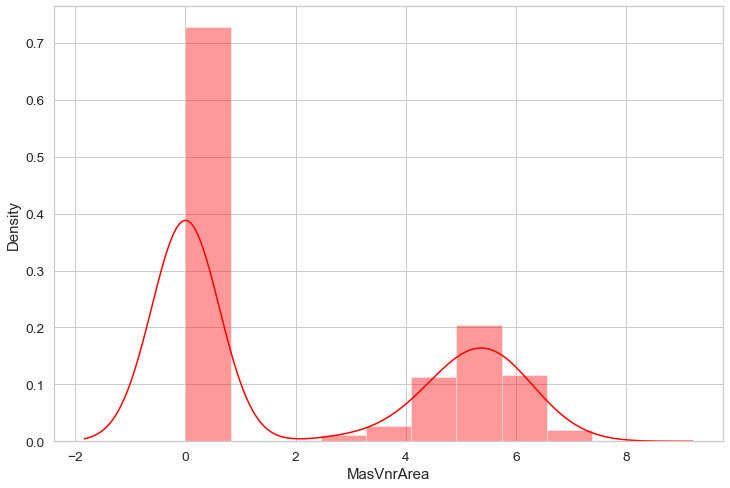

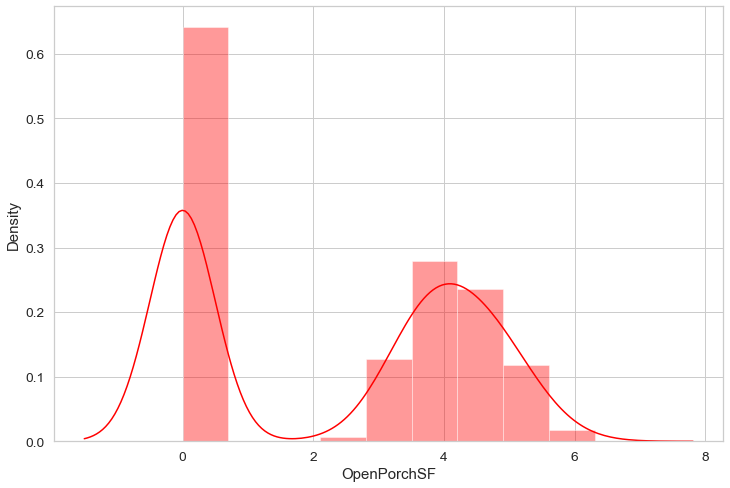

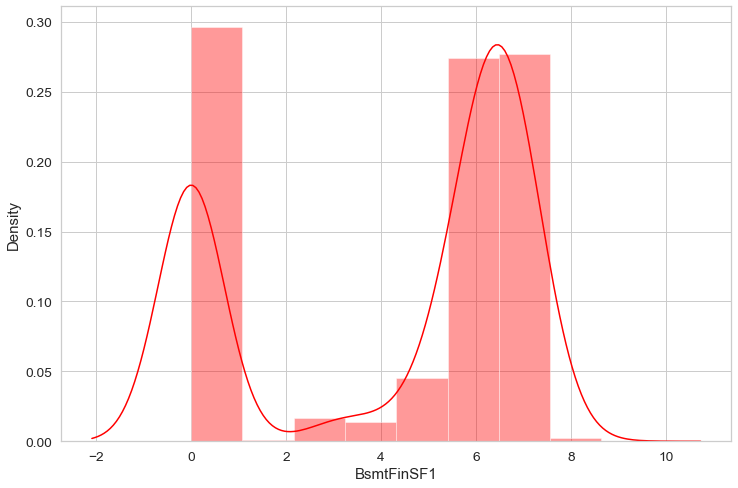

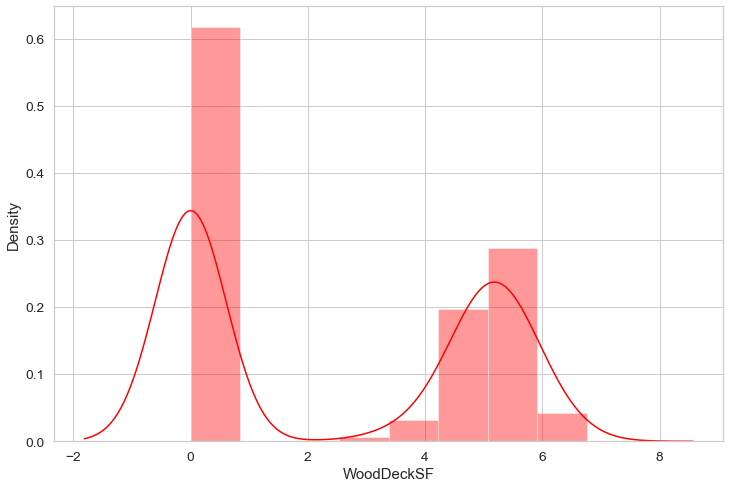

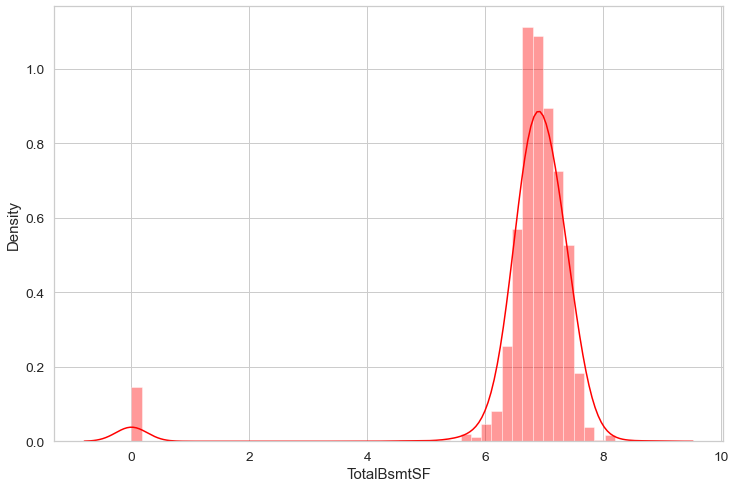

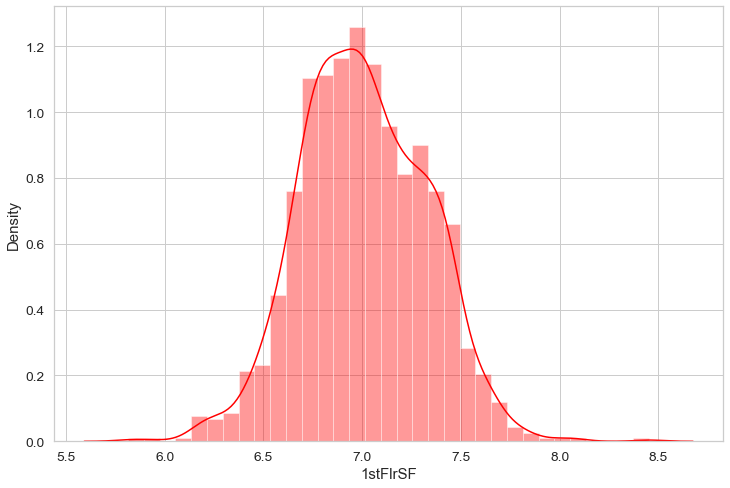

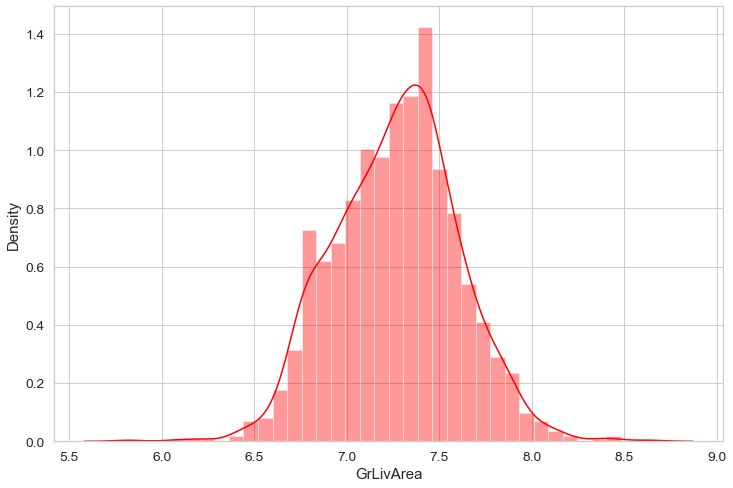

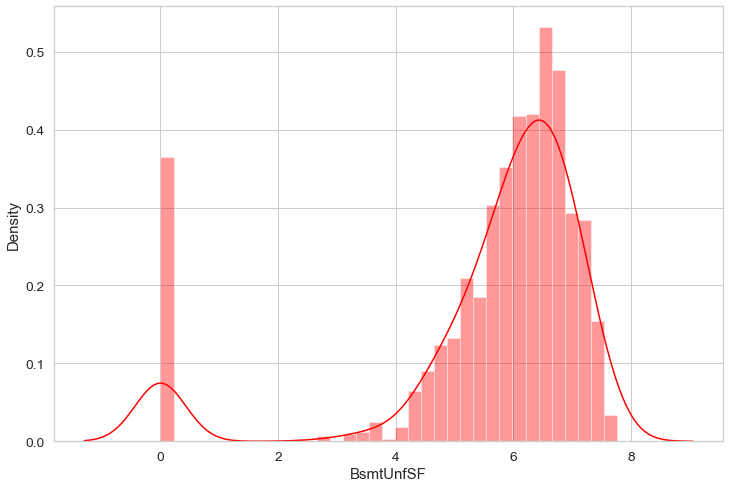

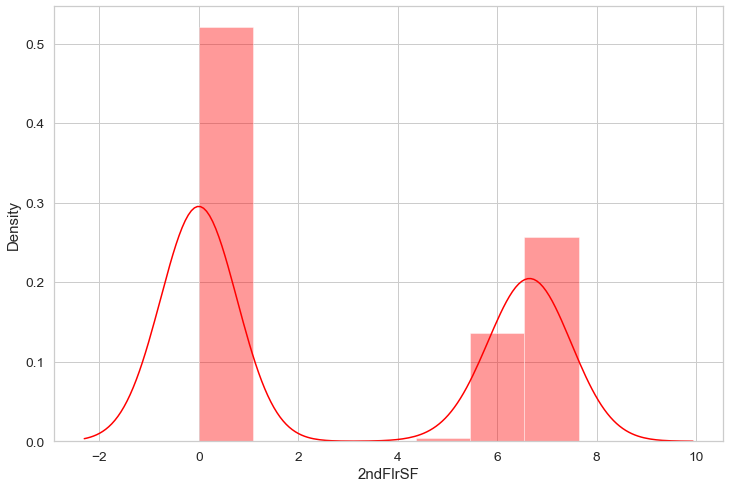

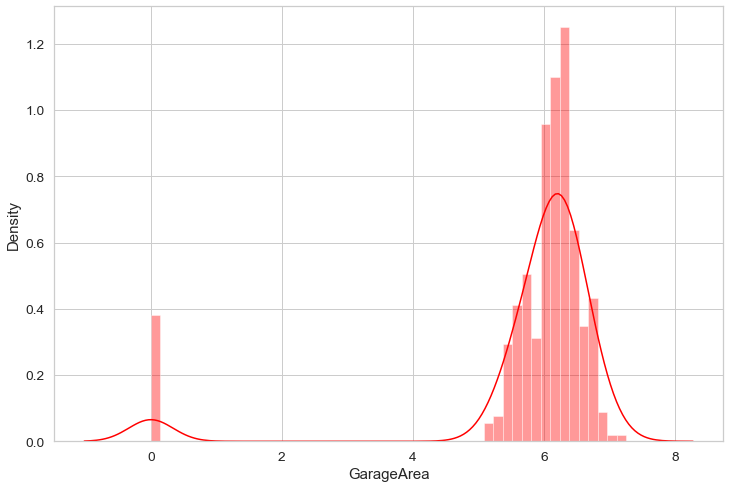

In [45]:
for col in skewness.index:
    train_numerical[col]=(np.log1p(train_numerical[col]))
    test_numerical[col]=(np.log1p(test_numerical[col]))

for col in skewness.index:
    f, ax = plt.subplots(figsize=(12, 8))
    sns.distplot(train_numerical[col], color='red')
    plt.show()

In [46]:
# Rank features
for col in ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual',
            'FireplaceQu', 'GarageQual','GarageCond']:
    train_categorical[col] = train_categorical[col].replace(['Ex','Gd','TA','Fa','Po', 'none'], [5, 4, 3, 2, 1, 0]).astype(int)
    test_categorical[col] = test_categorical[col].replace(['Ex','Gd','TA','Fa','Po', 'none'], [5, 4, 3, 2, 1, 0]).astype(int)

for i in ['BsmtExposure']:
    train_categorical[i] = train_categorical[i].replace(['Gd','Av','Mn','No', 'none'], [4, 3, 2, 1, 0]).astype(int)
    test_categorical[i] = test_categorical[i].replace(['Gd','Av','Mn','No', 'none'], [4, 3, 2, 1, 0]).astype(int)
    
for i in ['BsmtFinType1','BsmtFinType2']:
    train_categorical[i] = train_categorical[i].replace(['GLQ','ALQ','BLQ','Rec', 'LwQ','Unf','none'], [6, 5, 4, 3, 2, 1, 0]).astype(int)
    test_categorical[i] = test_categorical[i].replace(['GLQ','ALQ','BLQ','Rec', 'LwQ','Unf','none'], [6, 5, 4, 3, 2, 1, 0]).astype(int)

In [47]:
# Convert Year features to string type
for col in ['YrSold','MSSubClass','MoSold']:
    train_numerical[col] = train_numerical[col].astype(str)
    test_numerical[col] = test_numerical[col].astype(str)

In [48]:
train_numerical.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,9.042040,7,5,2003,2003,5.283204,6.561031,0.0,...,6.308098,0.000000,4.127134,0.000000,0.0,0.0,0.0,0.0,2,2008
1,20,80.0,9.169623,6,8,1976,1976,0.000000,6.886532,0.0,...,6.133398,5.700444,0.000000,0.000000,0.0,0.0,0.0,0.0,5,2007
2,60,68.0,9.328212,7,5,2001,2002,5.093750,6.188264,0.0,...,6.411818,0.000000,3.761200,0.000000,0.0,0.0,0.0,0.0,9,2008
3,70,60.0,9.164401,7,5,1915,1970,0.000000,5.379897,0.0,...,6.466145,0.000000,3.583519,5.609472,0.0,0.0,0.0,0.0,2,2006
4,60,84.0,9.565284,8,5,2000,2000,5.860786,6.486161,0.0,...,6.729824,5.262690,4.442651,0.000000,0.0,0.0,0.0,0.0,12,2008


In [49]:
test_numerical.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,20,20.0,9.360741,5,6,1961,1961,0.000000,6.150603,4.976734,...,6.594413,4.948760,0.000000,0.0,0.0,4.795791,0.0,0.000000,6,2010
1,20,20.0,9.565775,6,6,1958,1958,4.691348,6.828712,0.000000,...,5.746203,5.976351,3.610918,0.0,0.0,0.000000,0.0,9.433564,6,2010
2,60,60.0,9.534668,5,5,1997,1998,0.000000,6.674561,0.000000,...,6.180017,5.361292,3.555348,0.0,0.0,0.000000,0.0,0.000000,3,2010
3,60,60.0,9.208238,6,6,1998,1998,3.044522,6.401917,0.000000,...,6.154858,5.888878,3.610918,0.0,0.0,0.000000,0.0,0.000000,6,2010
4,120,120.0,8.518392,8,5,1992,1992,0.000000,5.575949,0.000000,...,6.228511,0.000000,4.418841,0.0,0.0,4.976734,0.0,0.000000,1,2010


In [105]:
# One-hot encoding
df_train = pd.concat((train_numerical, train_categorical), axis=1).reset_index(drop=True)
print("All training data size is : {}".format(df_train.shape))
n_train = df_train.shape[0]
df_train.head()

All training data size is : (1460, 232)


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,FireplaceQu,GarageQual,GarageCond,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MasVnrType_none,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Electrical_none,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_none,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_none,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,9.042040,7,5,2003,2003,5.283204,6.561031,0.0,5.017280,6.753438,6.753438,6.751101,0.0,7.444833,1,0,2,1,3,1,8,0,2003.0,2,6.308098,0.000000,4.127134,0.000000,0.0,0.0,0.0,0.0,2,2008,4,3,4,3,1,6,1,5,4,0,3,3,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [106]:
df_train_missing = df_train.isnull().sum().sort_values(ascending=False)
df_train_missing

MSSubClass               0
Exterior2nd_CBlock       0
Exterior1st_ImStucc      0
Exterior1st_MetalSd      0
Exterior1st_Plywood      0
                        ..
Neighborhood_MeadowV     0
Neighborhood_Mitchel     0
Neighborhood_NAmes       0
Neighborhood_NPkVill     0
SaleCondition_Partial    0
Length: 232, dtype: int64

In [72]:
df_test = pd.concat((test_numerical, test_categorical), axis=1).reset_index(drop=True)
print("All test data size is : {}".format(df_test.shape))
n_test = df_test.shape[0]
df_test.head()

All test data size is : (1459, 222)


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,FireplaceQu,GarageQual,GarageCond,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MSZoning_none,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior1st_none,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Exterior2nd_none,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MasVnrType_none,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_Wall,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,Functional_none,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_none,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_none,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleType_none,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,20,20.0,9.360741,5,6,1961,1961,0.000000,6.150603,4.976734,5.602119,6.783325,6.799056,0.000000,0.0,6.799056,0.0,0.0,1,0,2,1,5,0,1961.0,1.0,6.594413,4.948760,0.000000,0.0,0.0,4.795791,0.0,0.000000,6,2010,3,3,3,3,1,3,2,3,3,0,3,3,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0

In [103]:
df_test_missing = df_test.isnull().sum().sort_values(ascending=False)
df_test_missing

MSSubClass               0
Exterior2nd_CmentBd      0
Exterior1st_Plywood      0
Exterior1st_Stucco       0
Exterior1st_VinylSd      0
                        ..
Neighborhood_CollgCr     0
Neighborhood_Crawfor     0
Neighborhood_Edwards     0
Neighborhood_Gilbert     0
SaleCondition_Partial    0
Length: 222, dtype: int64

In [111]:
all_data = pd.concat((df_train, df_test)).reset_index(drop=True)
all_data = pd.get_dummies(all_data)
all_data = all_data.dropna(axis=1)
print(all_data.shape)
all_data.head()

(2919, 247)


,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,FireplaceQu,GarageQual,GarageCond,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MasVnrType_none,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_Wall,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_none,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_none,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MoSold_1,MoSold_10,MoSold_11,MoSold_12,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,YrSold_2006,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010
0,65.0,9.042040,7,5,2003,2003,5.283204,6.561031,0.0,5.017280,6.753438,6.753438,6.751101,0.0,7.444833,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,6.308098,0.000000,4.127134,0.000000,0.0,0.0,0.

In [112]:
X_train = all_data[:n_train]
X_test = all_data[n_train:]

In [114]:
X_train.isnull().sum().sort_values(ascending=False)

LotFrontage             0
Exterior2nd_Wd Sdng     0
MasVnrType_BrkCmn       0
MasVnrType_BrkFace      0
MasVnrType_None         0
                       ..
Neighborhood_Sawyer     0
Neighborhood_SawyerW    0
Neighborhood_Somerst    0
Neighborhood_StoneBr    0
YrSold_2010             0
Length: 247, dtype: int64

In [115]:
type(train_label)
y_train = np.log1p(train_label).to_numpy()

## Step 4: Model Training

In [137]:
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV
from xgboost.sklearn import XGBRegressor
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import math

In [138]:
# Train single model
scaler = RobustScaler()
scaler.fit_transform(X_train)

X_part, X_val, y_part, y_val = train_test_split(X_train, y_train ,test_size = 0.3, random_state=87)


# Ridge Regression
alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
ridge_reg = RidgeCV(alphas=alphas, cv=5, normalize=True)
ridge_reg.fit(X_part, y_part)
y_ridge_part_pred = ridge_reg.predict(X_part)
y_ridge_val_pred = ridge_reg.predict(X_val)
ridge_reg.fit(X_train, y_train)
y_ridge_train_pred = ridge_reg.predict(X_train)
print("Ridge, Partial Train RMSE = ", (mean_squared_error(y_part, y_ridge_part_pred))**(1/2))
print("Ridge, Validation RMSE = ", (mean_squared_error(y_val, y_ridge_val_pred))**(1/2))
print("Ridge, Tatal Train RMSE = ", (mean_squared_error(y_train, y_ridge_train_pred))**(1/2))

Ridge, Partial Train RMSE =  0.09988955676202371
Ridge, Validation RMSE =  0.12284886363412784
Ridge, Tatal Train RMSE =  0.10379019724837199


In [139]:
from sklearn.linear_model import LassoCV

# set cross-validation alpha
alpha=[0.0001, 0.001,0.01,0.1,1,10,100]

# find the best alpha and build model
Lasso = LassoCV(cv=5, alphas=alpha, normalize=True)

Lasso.fit(X_part, y_part)
y_lasso_part_pred = Lasso.predict(X_part)
y_lasso_val_pred = Lasso.predict(X_val)
Lasso.fit(X_train, y_train)
y_lasso_train_pred = Lasso.predict(X_train)

print("Lasso, Partial Train RMSE = ", (mean_squared_error(y_part, y_lasso_part_pred))**(1/2))
print("Lasso, Validation RMSE = ", (mean_squared_error(y_val, y_lasso_val_pred))**(1/2))
print("Lasso, Tatal Train RMSE = ", (mean_squared_error(y_train, y_lasso_train_pred))**(1/2))

Lasso, Partial Train RMSE =  0.10596290278268829
Lasso, Validation RMSE =  0.11878975692085686
Lasso, Tatal Train RMSE =  0.10986885026906738


In [140]:
from sklearn.linear_model import ElasticNetCV

# set cross-validation alpha and l1ratio
alpha=[0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
l1ratio = [0.1, 0.5, 0.9, 0.95, 0.99, 1]

# find the best alpha/ l1ratio and build model
ElasticNet = ElasticNetCV(cv=5, alphas=alpha, l1_ratio=l1ratio, normalize=True)
ElasticNet.fit(X_part, y_part)
y_en_part_pred = ElasticNet.predict(X_part)
y_en_val_pred = ElasticNet.predict(X_val)
ElasticNet.fit(X_train, y_train)
y_en_train_pred = ElasticNet.predict(X_train)

print("Elastic Net, Partial Train RMSE = ", (mean_squared_error(y_part, y_en_part_pred))**(1/2))
print("Elastic Net, Validation RMSE = ", (mean_squared_error(y_val, y_en_val_pred))**(1/2))
print("Elastic Net, Tatal Train RMSE = ", (mean_squared_error(y_train, y_en_train_pred))**(1/2))

Elastic Net, Partial Train RMSE =  0.10596290278268829
Elastic Net, Validation RMSE =  0.11878975692085686
Elastic Net, Tatal Train RMSE =  0.10986885026906738


In [141]:
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
xgb = XGBRegressor(objective='reg:squarederror')

parameter_grid={
    'n_estimators': range(100, 1000, 50), 
    'max_depth': [2, 3, 4, 5, 6],
    'min_child_weight': [1, 2, 3, 4, 5, 6],
    'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
    'colsample_bytree': np.linspace(0.1, 0.9, 10),
    'learning_rate': np.linspace(0.001, 1, 20),
}

grid = RandomizedSearchCV(xgb, parameter_grid, cv=5, scoring='r2', n_jobs=-1)
grid.fit(X_part, y_part)

# print best parameter combination
print (grid.best_params_)

{'n_estimators': 100, 'min_child_weight': 2, 'max_depth': 4, 'learning_rate': 0.36905263157894735, 'gamma': 0.1, 'colsample_bytree': 0.9}


In [142]:
from xgboost.sklearn import XGBRegressor
xgb = XGBRegressor(booster='gbtree',
                   objective='reg:squarederror',
                   eval_metric='rmse',
                   gamma=0.1,
                   min_child_weight=2,
                   max_depth=4,
                   colsample_bytree=0.9,
                   tree_method='exact',
                   learning_rate=0.36905263157894735,
                   n_estimators=100,
                   scale_pos_weight=1,
                   seed=87)
xgb.fit(X_part, y_part)
y_xgb_part_pred = xgb.predict(X_part)
y_xgb_val_pred = xgb.predict(X_val)
xgb.fit(X_train, y_train)
y_xgb_train_pred = ElasticNet.predict(X_train)

print("XGBoost, Partial Train RMSE = ", (mean_squared_error(y_part, y_xgb_part_pred))**(1/2))
print("XGBoost, Validation RMSE = ", (mean_squared_error(y_val, y_xgb_val_pred))**(1/2))
print("XGBoost, Tatal Train RMSE = ", (mean_squared_error(y_train, y_xgb_train_pred))**(1/2))

XGBoost, Partial Train RMSE =  0.08594331417714828
XGBoost, Validation RMSE =  0.13522842982775438
XGBoost, Tatal Train RMSE =  0.10986885026906738


### Ensemble learning: voting and stacking

In [143]:
from sklearn.ensemble import VotingRegressor
# Build Model
vote_model = VotingRegressor([('Ridge', ridge_reg), ('Lasso', Lasso), ('Elastic', ElasticNet), ('xgb', xgb)])
vote_model.fit(X_part, y_part)

# predict part, val, train
y_vote_part_pred = vote_model.predict(X_part)
y_vote_val_pred = vote_model.predict(X_val)
vote_model.fit(X_train, y_train)
y_vote_train_pred = vote_model.predict(X_train)

print("Voting, Partial Train RMSE = ", (mean_squared_error(y_part, y_vote_part_pred))**(1/2))
print("Voting, Validation RMSE = ", (mean_squared_error(y_val, y_vote_val_pred))**(1/2))
print("Voting, Tatal Train RMSE = ", (mean_squared_error(y_train, y_vote_train_pred))**(1/2))

Voting, Partial Train RMSE =  0.09283338301008005
Voting, Validation RMSE =  0.11658214995162224
Voting, Tatal Train RMSE =  0.09647718647725675


In [144]:
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import RandomForestRegressor

estimators = [('Ridge', ridge_reg), ('Lasso', Lasso), ('Elastic', ElasticNet), ('xgb', xgb)]
stacking_model = StackingRegressor(estimators, 
                                   final_estimator=RandomForestRegressor(n_estimators=10, random_state=87))

stacking_model.fit(X_part, y_part)
y_stack_part_pred = stacking_model.predict(X_part)
y_stack_val_pred = stacking_model.predict(X_val)
stacking_model.fit(X_train, y_train)
y_stack_train_pred = stacking_model.predict(X_train)

print("Stacking, Partial Train RMSE = ", (mean_squared_error(y_part, y_stack_part_pred))**(1/2))
print("Stacking, Validation RMSE = ", (mean_squared_error(y_val, y_stack_val_pred))**(1/2))
print("Stacking, Tatal Train RMSE = ", (mean_squared_error(y_train, y_stack_train_pred))**(1/2))

Stacking, Partial Train RMSE =  0.10542550571664606
Stacking, Validation RMSE =  0.1296181326993851
Stacking, Tatal Train RMSE =  0.1042499289394664


## Step 6: Submit

In [145]:
# Final prediction
y_test = vote_model.predict(X_test)

# reverse log y
final_pred = np.expm1(y_test)

a=list(range(1461,2920,1))
submit=pd.DataFrame({'Id':list(range(1461,2920,1)),
                     'SalePrice':final_pred})
    
# save as csv     
submit.to_csv('submit_v1_2_4.csv', index=False)

In [ ]:
# predict and blending
final_pred_voting=vote.predict(Test)
final_pred_stacking=stack_mod.predict(Test)
final_pred_blending=0.94*final_pred_voting+0.06*final_pred_stacking
# reverse log y
final_pred_blending=np.expm1(final_pred_blending)
a=list(range(1461,2920,1))
submit=pd.DataFrame({'Id':list(range(1461,2920,1)),
                     'SalePrice':final_pred_blending})
    
# save as csv     
submit.to_csv('submit.csv',index=False)